<a href="https://colab.research.google.com/github/aparna-pillai/Technology-News-Insights-Engine/blob/main/Industry_Specific_Queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started Notes

Project FAQs can be found (or added to) [here](https://docs.google.com/spreadsheets/d/1Av01IrDMITM5haDGDFq1DemD4W28fDLjJD9S9ewUQig/edit?usp=sharing)

1) you'll want to accept the invitation to the Neo4j Aura Tenant, which may require you to create an account (free)

2) go to [the Neo4j Aura console](console.neo4j.io) to log in

3) once logged in, find the "BTT AI ACN" Organization/Tenant

4) there are 2 'instances' in the project, you are interested in "TechNewsGraph_BTT"
- Note: data is still being loaded to this graph

5) if you "open" this instance, you're taken to a Neo4j Workspace where you can

- query the graph (Neo4j's query language is called "Cypher", and AI assistants know a bit about how to write Cypher)
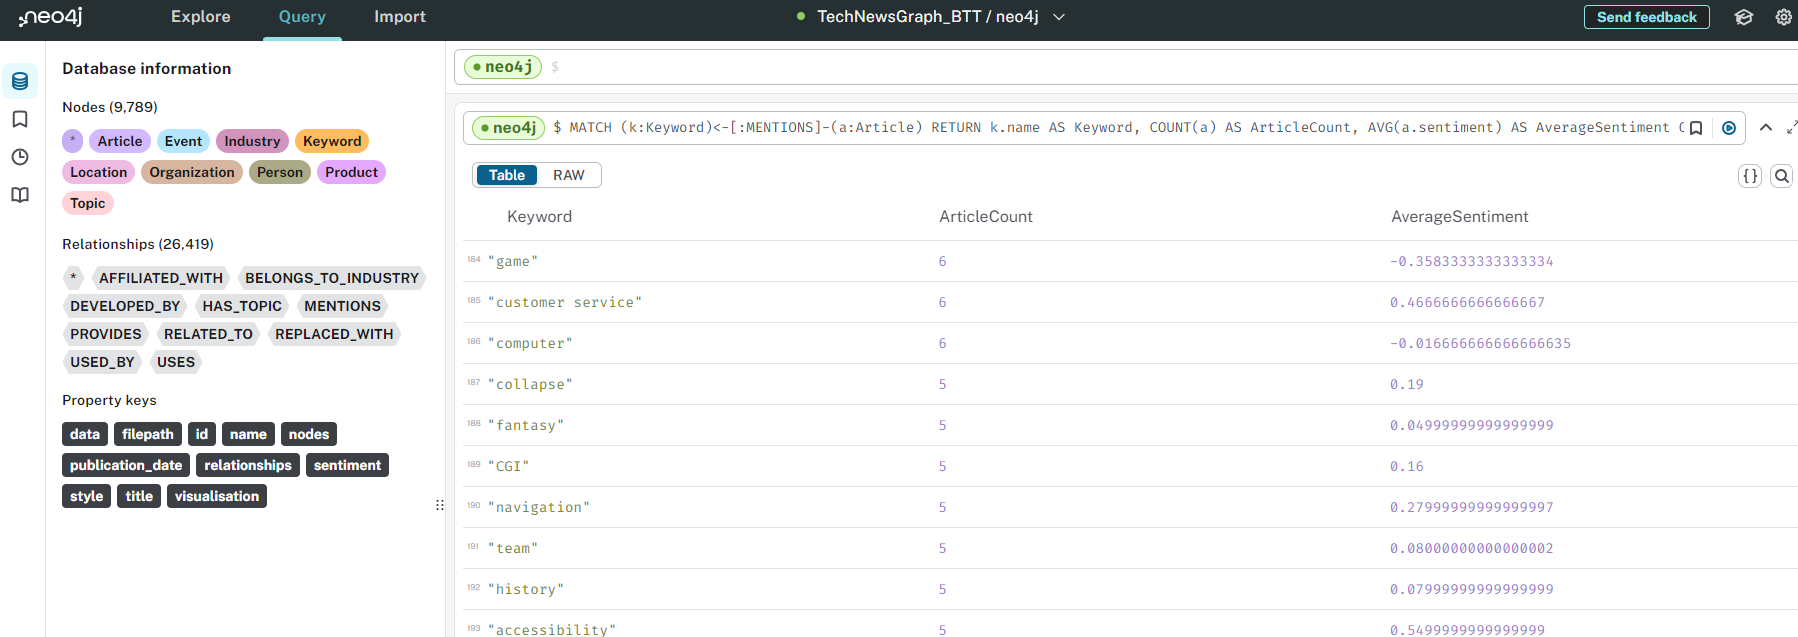

- visualize/explore the graph
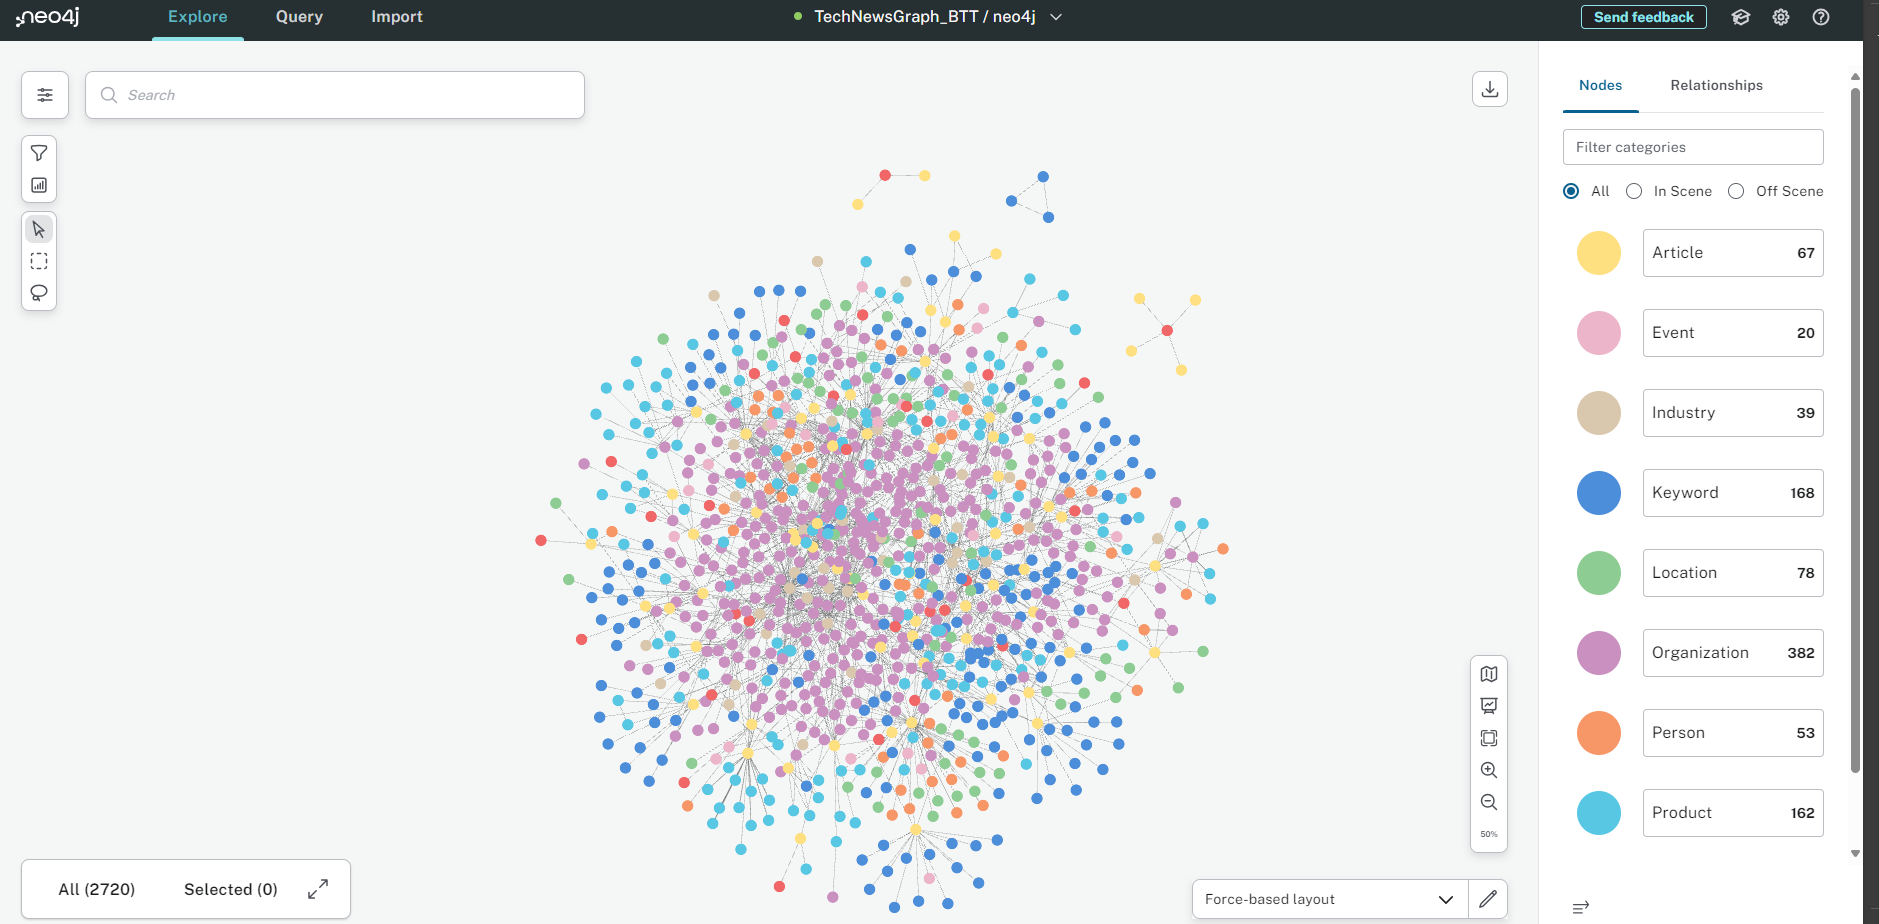


# Setup

In [ ]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
from neo4j import GraphDatabase

# Connect to the Database

Note: there are multiple instances of the graph, so it's not catastrophic if this happens, but do not use any DELETE commands, since it's possible to do so with this key

In [ ]:
# clone to new graph instance
neo4j_pass_prof = "Fpz12jA1x46VDU0j53kGGTspKb1nVgeqT5xb3mYeNI0"
driver = GraphDatabase.driver("neo4j+s://2003b312.databases.neo4j.io", auth=("neo4j", neo4j_pass_prof))

# View Database Schema

you might want to do this, so you can get a little help, like I did [here](https://chatgpt.com/share/66eb9dfd-4440-8001-8f6b-92ce6292ae6f)

In [ ]:
# view graph schema
def get_graph_schema():
    with driver.session() as session:
        # Run the APOC procedure to get the schema
        result = session.run(
            """
            CALL apoc.meta.schema()
            """
        )
        # Extract the schema information
        schema = result.single()
        return schema

# Usage
graph_schema = get_graph_schema()
display(graph_schema)

<Record value={'Keyword': {'count': 1877, 'labels': [], 'properties': {'name': {'unique': False, 'indexed': False, 'type': 'STRING', 'existence': False}}, 'type': 'node', 'relationships': {'HAS_TOPIC': {'count': 0, 'direction': 'out', 'labels': ['Topic', 'Article', 'Product', 'Event'], 'properties': {}}, 'MENTIONS': {'count': 30555, 'direction': 'in', 'labels': ['Article', 'Organization', 'Person', 'Product'], 'properties': {}}, 'AFFILIATED_WITH': {'count': 1077, 'direction': 'in', 'labels': ['Person'], 'properties': {}}, 'USES': {'count': 10, 'direction': 'in', 'labels': ['Organization', 'Product'], 'properties': {}}, 'RELATED_TO': {'count': 20, 'direction': 'out', 'labels': ['Keyword', 'Product', 'Organization', 'Person', 'Product', 'Location', 'Event', 'Keyword'], 'properties': {}}, 'BELONGS_TO_INDUSTRY': {'count': 0, 'direction': 'out', 'labels': ['Industry', 'Organization'], 'properties': {}}, 'USED_BY': {'count': 18, 'direction': 'in', 'labels': ['Organization', 'Product', 'Event

# Node Summaries

In [ ]:
def get_node_type_counts():
    with driver.session() as session:
        # Run the Cypher query
        result = session.run(
            """
            MATCH (n)
            RETURN labels(n) AS NodeType, COUNT(n) AS Count
            ORDER BY Count DESC
            """
        )

        # Extract results and convert to a pandas DataFrame
        data = [{"NodeType": record["NodeType"], "Count": record["Count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Retrieve the node type counts and display as a DataFrame
node_type_counts_df = get_node_type_counts()
display(node_type_counts_df)

NodeType  Count
0  [Organization]  11155
1        [Entity]   4160
2       [Product]   4143
3       [Article]   3684
4       [Keyword]   1877
5        [Person]   1651
6      [Location]    762
7         [Event]    625
8      [Industry]    249
9         [Topic]     89

# Sentiment by Keyword

In [ ]:
def get_average_sentiment_for_keywords():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (k:Keyword)<-[:MENTIONS]-(a:Article)
            RETURN k.name AS Keyword, AVG(a.sentiment) AS average_sentiment
            ORDER BY average_sentiment DESC
            LIMIT 10
            """
        )

        # Convert results to DataFrame
        data = [{"Keyword": record["Keyword"], "average_sentiment": record["average_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
average_sentiment_df = get_average_sentiment_for_keywords()
display(average_sentiment_df)


Keyword  average_sentiment
0            give                NaN
1    Saudi Arabia                NaN
2             GPS               0.90
3      commitment               0.90
4  cinematography               0.85
5     perspective               0.85
6    customisable               0.85
7       prismatic               0.85
8      excellence               0.85
9     carbonfibre               0.85

# Article Count by Topic/Date

In [ ]:
def get_article_count_by_topic_and_date():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            WITH t.name AS topic_name, date(a.publication_date) AS pub_date, a
            RETURN topic_name, pub_date.year AS year, pub_date.month AS month, COUNT(a) AS article_count
            ORDER BY topic_name, year, month
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "year": record["year"], "month": record["month"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_topic_and_date_df = get_article_count_by_topic_and_date()
display(article_count_by_topic_and_date_df)


topic_name    year  month  article_count
0      5G Technology  2022.0   11.0              1
1      5G Technology  2022.0   12.0              5
2      5G Technology  2023.0    1.0              8
3      5G Technology  2023.0    2.0              5
4      5G Technology  2023.0    3.0              8
..               ...     ...    ...            ...
562  Web Development  2023.0    1.0              1
563  Web Development  2023.0    4.0              2
564  Web Development  2023.0    7.0              1
565  Web Development  2023.0    9.0              2
566  Web Development  2023.0   10.0              1

[567 rows x 4 columns]

# Keyword Co-Occurrence

In [ ]:
def get_keyword_co_occurrence():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k1:Keyword), (a)-[:MENTIONS]->(k2:Keyword)
            WHERE k1 <> k2
            RETURN k1.name AS Keyword1, k2.name AS Keyword2, COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            LIMIT 1000
            """
        )

        # Convert results to DataFrame
        data = [{"Keyword1": record["Keyword1"], "Keyword2": record["Keyword2"], "co_occurrence_count": record["co_occurrence_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
keyword_co_occurrence_df = get_keyword_co_occurrence()
display(keyword_co_occurrence_df.sample(10))


Keyword1  Keyword2  co_occurrence_count
708      network      HTTP                   20
588  preferences       hub                   24
613     business       hub                   24
140      service   request                   34
273         news    events                   26
417     register   culture                   25
421   experience   culture                   25
859         HTTP  security                   16
484      content   service                   25
275     settings   updates                   26

# Article Count by Topic

In [ ]:
def get_article_count_by_topic():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            RETURN t.name AS topic_name, COUNT(a) AS article_count
            ORDER BY article_count DESC
            LIMIT 10
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_topic_df = get_article_count_by_topic()
display(article_count_by_topic_df)


topic_name  article_count
0                            Artificial Intelligence            699
1                       Digital Payments and Fintech            229
2                                      Cybersecurity            212
3                                         Blockchain            137
4  Consumer Electronics (e.g., smartphones, weara...            130
5                       E-commerce and Online Retail            105
6                             Digital Transformation            104
7                              Healthcare Technology             99
8                                    Cloud Computing             97
9      Automotive Technology and Autonomous Vehicles             93

# Top Keywords by Topic

In [ ]:
def get_mentions_of_keywords_by_topic():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[:MENTIONS]->(k:Keyword)
            RETURN t.name AS topic_name, k.name AS keyword, COUNT(a) AS mention_count
            ORDER BY topic_name, mention_count DESC
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
mentions_of_keywords_by_topic_df = get_mentions_of_keywords_by_topic()
display(mentions_of_keywords_by_topic_df)


topic_name        keyword  mention_count
0       5G Technology         trends             11
1       5G Technology     challenges             10
2       5G Technology        Telecom             10
3       5G Technology       insights              8
4       5G Technology         access              8
...               ...            ...            ...
5804  Web Development      tutorials              1
5805  Web Development         skills              1
5806  Web Development  opportunities              1
5807  Web Development        metrics              1
5808  Web Development     e-commerce              1

[5809 rows x 3 columns]

# Distinct Article Count by Industry

In [ ]:
def get_article_count_by_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            RETURN i.name AS industry, COUNT(DISTINCT a) AS article_count
            ORDER BY article_count DESC
            LIMIT 30
            """
        )

        # Convert results to DataFrame
        data = [{"industry_name": record["industry"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_industry_df = get_article_count_by_industry()
display(article_count_by_industry_df)


industry_name  article_count
0      Communications and Media           1979
1        Software and Platforms           1516
2                     High Tech           1400
3                Public Service           1161
4   Consumer Goods and Services            954
5                       Banking            799
6                        Health            701
7               Capital Markets            632
8                        Retail            491
9         US Federal Government            364
10                   Automotive            282
11                    Insurance            273
12        Aerospace and Defense            249
13                       Travel            247
14                Life Sciences            209
15                       Energy            202
16                   Industrial            137
17            Natural Resources             74
18                    Utilities             68
19                    Chemicals             51

# Sentiment Analysis and Trend Forecasting

In [ ]:
def get_sentiment_trend_keyword():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (k:Keyword)<-[:MENTIONS]-(a:Article)
            WHERE a.publication_date IS NOT NULL AND a.sentiment IS NOT NULL
            WITH k.name AS keyword,
                date.truncate('month', a.publication_date) AS month_year,
                a.sentiment AS sentiment
            RETURN keyword,
                month_year.year AS year,
                month_year.month AS month,
                AVG(sentiment) AS avg_sentiment
            ORDER BY year, month, keyword;
            """
        )

        # Convert results to DataFrame
        data = [{"keyword": record["keyword"], "year": record["year"], "month": record["month"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
sentiment_trend_keyword_df = get_sentiment_trend_keyword()
display(sentiment_trend_keyword_df)


keyword  year  month  avg_sentiment
0                  format  2014      3          0.750
1                    list  2014      3          0.750
2           Breaking News  2019      3          0.100
3           Business News  2019      3          0.100
4     Latest News Updates  2019      3          0.100
...                   ...   ...    ...            ...
6701              website  2023     10         -0.225
6702               weight  2023     10          0.300
6703            workforce  2023     10         -0.200
6704            workshops  2023     10          0.950
6705                world  2023     10          0.800

[6706 rows x 4 columns]

In [ ]:
def get_sentiment_trend_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (i:Industry)<-[:BELONGS_TO_INDUSTRY]-(n)-[:MENTIONS]-(a:Article)
            WHERE a.publication_date IS NOT NULL AND a.sentiment IS NOT NULL
            WITH i.name AS industry,
                date.truncate('month', a.publication_date) AS month_year,
                a.sentiment AS sentiment
            RETURN industry,
                month_year.year AS year,
                month_year.month AS month,
                AVG(sentiment) AS avg_sentiment
            ORDER BY year, month, industry;
            """
        )

        # Convert results to DataFrame
        data = [{"industry": record["industry"], "year": record["year"], "month": record["month"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
sentiment_trend_industry_df = get_sentiment_trend_industry()
display(sentiment_trend_industry_df)

industry  year  month  avg_sentiment
0                        Banking  2019      3       0.100000
1       Communications and Media  2019      3       0.475000
2    Consumer Goods and Services  2019      3       0.850000
3                         Health  2019      3       0.100000
4                      High Tech  2019      3       0.850000
..                           ...   ...    ...            ...
299  Consumer Goods and Services  2023     11       0.500000
300                       Health  2023     11       0.616667
301                    High Tech  2023     11       0.675000
302               Public Service  2023     11       0.500000
303       Software and Platforms  2023     11       0.750000

[304 rows x 4 columns]

# NEW ADDED QUERIES HERE:

# Industry: Industrial

In [ ]:
# Sentiment Analysis on articles involving the industrial industry
def get_industrial_industry_sentiment():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Industrial'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date
            ORDER BY a.sentiment DESC
            LIMIT 20
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"], "sentiment": record["sentiment"], "publication_date": record["publication_date"]} for record in result]
        df = pd.DataFrame(data)
        average_sentiment = df["sentiment"].mean()

        return df, average_sentiment

# Usage
industrial_industry_sentiment_df, industrial_average_sentiment = get_industrial_industry_sentiment()
display(industrial_industry_sentiment_df)
#pd.set_option('display.max_colwidth', None)
#print(industrial_industry_sentiment_df.head(3))
print("\nAverage Sentiment: ", industrial_average_sentiment)

article_title  \
0                                                                                  New Mangalore Port sets record with largest container parcel vessel   
1                                             CMTC Helps Control Solutions Provider Boost Business with Lean Quality & Information Technology Services   
2                                                                                                          Claroty partnership con alcuni MSSP globali   
3                                                                                                                 2023 Careers Divisions Programs Menu   
4                                                                                                                 2023 Careers Divisions Programs Menu   
5                                                                                                                 2023 Careers Divisions Programs Menu   
6                             Prysmian Group: FibreONE Partnership Celebrates 2nd Anniversary Continues to Provide Trusted Broadband Support in Canada   
7                                                                                          Revolution Wind project construction underway in Providence   
8                                                                                                          Claroty partnership con alcuni MSSP globali   
9                                                                                                          Claroty partnership con alcuni MSSP globali   
10                                                                                                                2023 Careers Divisions Programs Menu   
11                                                                                                                2023 Careers Divisions Programs Menu   
12                                          NordicNinja Europe’s Largest Japanese VC Announces €200M Fund II to Help Founders Tackle Global Challenges   
13                                                                                                                2023 Careers Divisions Programs Menu   
14                                                                                                        ASV Launches VT-100 and VT-100 Forestry CTLs   
15                                                                                         FREQUENTIS acquires Norwegian software company GuardREC ATC   
16  Global Times: President Xi's inspections encourage continuous effort in conservation of 'Gold Corn Belt' and advancement of high-end manufacturing   
17                                                Daffodil Software features in PEAK Matrix® Assessment 2022 for Software Product Engineering Services   
18                             HighRadius Named a Leader in the 2023 Gartner® Magic Quadrant™ for the Integrated Invoice-to-Cash Applications Category   
19                                            CMTC Helps Control Solutions Provider Boost Business with Lean Quality & Information Technology Services   

    sentiment publication_date  
0        0.90       2023-07-01  
1        0.85       2023-09-07  
2        0.85       2023-07-03  
3        0.85       2023-10-06  
4        0.85       2023-10-06  
5        0.85       2023-10-06  
6        0.85       2023-04-10  
7        0.85       2023-05-01  
8        0.85       2023-07-03  
9        0.85       2023-07-03  
10       0.85       2023-10-06  
11       0.85       2023-10-06  
12       0.85       2023-09-12  
13       0.85       2023-10-06  
14       0.85       2023-04-01  
15       0.85       2023-07-09  
16       0.85       2023-08-14  
17       0.85       2023-01-13  
18       0.85       2023-05-08  
19       0.85       2023-09-07


Average Sentiment:  0.8525
The average sentiment score for all articles is: 0.8525


In [ ]:
# Visualization for sentiment analysis of industrial industry articles
import plotly.express as px
import pandas as pd

# Remove duplicates by averaging sentiment scores for articles with the same title!
top_10_industrial_articles = (
    industrial_industry_sentiment_df
    .groupby('article_title', as_index=False)
    .agg({'sentiment': 'mean', 'publication_date': 'first'})
    .sort_values(by='sentiment', ascending=False)
    .head(10)
)

top_10_industrial_articles['article_title'] = pd.Categorical(
    top_10_industrial_articles['article_title'],
    categories=top_10_industrial_articles.sort_values('sentiment', ascending=True)['article_title'],
    ordered=True
)

fig = px.bar(
    top_10_industrial_articles,
    x='sentiment',
    y='article_title',
    orientation='h',
    title="Top 10 Articles in 'industrial' Industry by Average Sentiment Score",
    labels={'sentiment': 'Sentiment Score', 'article_title': 'Article Title'},
    color='sentiment',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis_title="",
    xaxis_title="Sentiment Score",
    xaxis=dict(tickangle=45),
    showlegend=False,
    height=500
)

fig.show()

In [ ]:
# Get the topics associated with articles for the industrial industry
def get_articles_and_topics_for_industrial_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Industrial'})
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, collect(t.name) AS topics
            ORDER BY a.title
            LIMIT 20
            """
        )
        data = [{"article_title": record["article_title"], "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)

        return df

articles_and_topics_df = get_articles_and_topics_for_industrial_industry()
display(articles_and_topics_df)

article_title  \
0   1 Number That Should Worry General Dynamics Sh...   
1                        2022 - the year in Cloud ERP   
2   5 Biggest Industrial Software Companies in the...   
3   50 Most Valuable Companies in the World by Mar...   
4      7 Boring Stocks to Buy and Hold for a Lifetime   
5          A return to supersonic commercial aviation   
6   AI reduces radiologist workload in mammography...   
7        ASV Launches VT-100 and VT-100 Forestry CTLs   
8   AUTODESK INC. ANNOUNCES FISCAL 2023 FOURTH QUA...   
9   Agriculture Robots Market Worth $40.1 Billion ...   
10  Amata-invested industrial park in northern Vie...   
11  Analysts Offer Insights on Industrial Goods Co...   
12  Analysts’ Opinions Are Mixed on These Industri...   
13  Apache Corp. Moving Its Global Headquarters To...   
14  Aspen Technology Combines inmation Software an...   
15  Athena Security addresses unreported attacks w...   
16  Automating financial crime detection: Cable Te...   
17  Balancing power demands with reducing CO2 emis...   
18  Bank of America Securities Keeps Their Hold Ra...   
19                  Best Automation Companies in 2023   

                                               topics  
0                    [Fintech and Financial Services]  
1   [Enterprise Resource Planning (ERP), Enterpris...  
2   [Artificial Intelligence, Artificial Intellige...  
3                           [Artificial Intelligence]  
4   [E-commerce and Online Retail, E-commerce and ...  
5     [Automotive Technology and Autonomous Vehicles]  
6   [Artificial Intelligence, Artificial Intellige...  
7                                          [Robotics]  
8                      [Software as a Service (SaaS)]  
9   [Agriculture Technology (AgriTech), Agricultur...  
10  [Automotive Technology and Autonomous Vehicles...  
11  [Automotive Technology and Autonomous Vehicles...  
12  [Market Trends and Analysis, Market Trends and...  
13                           [Digital Transformation]  
14  [Digital Transformation, Digital Transformatio...  
15  [Cybersecurity, Cybersecurity, Cybersecurity, ...  
16                     [Digital Payments and Fintech]  
17  [Energy Tech and Renewable Energy, Energy Tech...  
18                       [Market Trends and Analysis]  
19  [Business Process Automation (BPA), Business P...

<ipython-input-69-efba8530997d>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




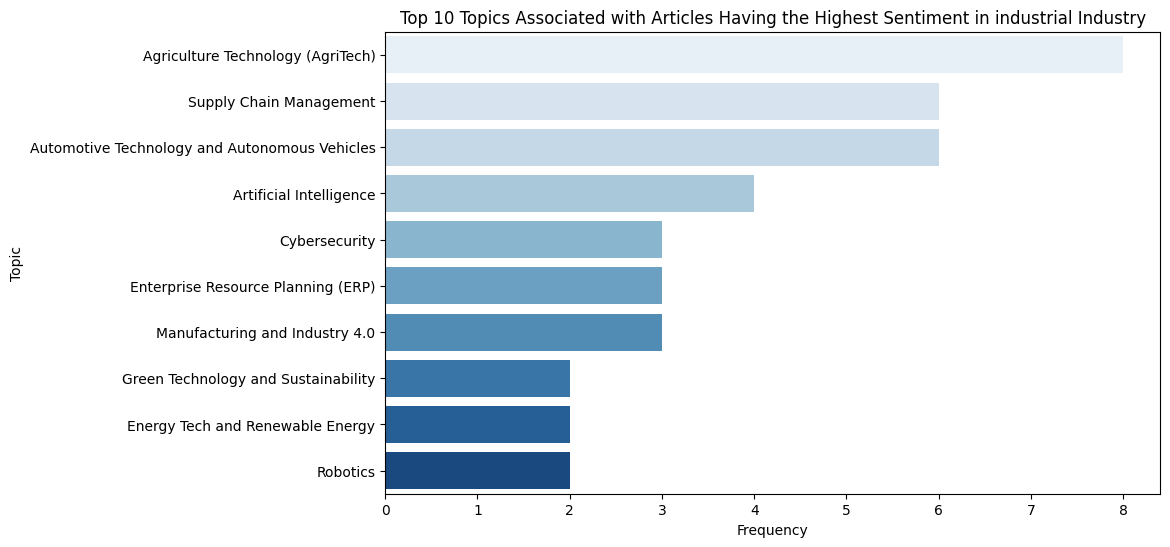

In [ ]:
# Visualize top topics within high sentiment articles in industrial industry
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

def get_industrial_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Industrial'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC
            """
        )
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)
        return df

industrial_industry_sentiment_with_topics_df = get_industrial_industry_sentiment_with_topics()
top_articles_df = industrial_industry_sentiment_with_topics_df.head(20)
topics_list = [topic for sublist in top_articles_df['topics'] for topic in sublist]
topic_counts = Counter(topics_list)
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='Blues')
plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment in industrial Industry')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()


In [ ]:
def get_industrial_articles_with_keywords():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Industrial'})
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[:MENTIONS]->(k:Keyword)
            RETURN a.title AS article_title, collect(t.name) AS topics, collect(k.name) AS keywords
            ORDER BY a.title
            LIMIT 20
            """
        )

        data = [{"article_title": record["article_title"], "topics": record["topics"], "keywords": record["keywords"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
industrial_articles_with_keywords_df = get_industrial_articles_with_keywords()
display(industrial_articles_with_keywords_df)

article_title  \
0          A return to supersonic commercial aviation   
1   AI reduces radiologist workload in mammography...   
2        Biomimetic Marine Infrastructures (MARINEFF)   
3            Breaking Down the Barriers to Innovation   
4   Destroying ‘forever chemicals’ is a technologi...   
5   Foreign investors' interest in India's compute...   
6   Future of sustainable manufacturing is technol...   
7                 German Machine Tool Orders Up Again   
8   Has the Digital Transformation Reached an Infl...   
9   How to Overcome Supply Chain Disruptions With ...   
10  Managed Print Services Market Size Expanding t...   
11  Missouri Construction Company Cited by OSHA fo...   
12            PPG Invests in Global Powder Production   
13  Salesforce vs. HubSpot: Which CRM Is Right for...   
14  Sany Launches SSR80 Soil Compactor for Roads P...   
15          The Best Kitchen Appliance Brands of 2023   

                                               topics  \
0   [Automotive Technology and Autonomous Vehicles...   
1   [Artificial Intelligence, Artificial Intellige...   
2   [Green Technology and Sustainability, Green Te...   
3   [Tech Startups and Innovation, Tech Startups a...   
4   [Green Technology and Sustainability, Green Te...   
5   [Manufacturing and Industry 4.0, Manufacturing...   
6   [Green Technology and Sustainability, Green Te...   
7   [Manufacturing and Industry 4.0, Manufacturing...   
8   [Digital Transformation, Digital Transformatio...   
9   [Supply Chain Management, Supply Chain Managem...   
10  [Cloud Computing, Cloud Computing, Cloud Compu...   
11  [Legal Tech, Legal Tech, Legal Tech, Legal Tec...   
12  [Manufacturing and Industry 4.0, Manufacturing...   
13  [Customer Relationship Management (CRM), Custo...   
14  [Manufacturing and Industry 4.0, Manufacturing...   
15  [Smart Home Devices, Smart Home Devices, Smart...   

                                             keywords  
0   [navigation, permission, challenges, demand, s...  
1                        [AI, accuracy, AI, accuracy]  
2   [infrastructure, environment, diversity, exper...  
3   [innovation, performance, management, impact, ...  
4   [technology, solutions, sustainability, testin...  
5   [investors, service, sector, system, manufactu...  
6   [sensors, optimization, permission, digital tr...  
7   [supply chain, information, quarter, productio...  
8   [innovation, security, digital transformation,...  
9   [supply chain, digital transformation, disrupt...  
10  [sustainability, operating costs, flexibility,...  
11  [insights, news, information, financial inform...  
12  [investment, experience, strategies, access, g...  
13  [knowledge, insights, advice, content, success...  
14                  [compensation, oil, parking lots]  
15  [innovation, quality, performance, functionali...

In [ ]:
def prepare_and_visualize_heatmap():
    df = get_industrial_articles_with_keywords()

    all_topics = []
    all_keywords = []

    for idx, row in df.iterrows():
        for topic in row['topics']:
            for keyword in row['keywords']:
                all_topics.append(topic)
                all_keywords.append(keyword)

    topic_keyword_pairs = list(zip(all_topics, all_keywords))
    pair_counts = Counter(topic_keyword_pairs)

    heatmap_data = pd.DataFrame(pair_counts.items(), columns=['Topic_Keyword', 'Mention_Count'])

    heatmap_data[['Topic', 'Keyword']] = pd.DataFrame(heatmap_data['Topic_Keyword'].tolist(), index=heatmap_data.index)
    heatmap_data = heatmap_data.drop(columns=['Topic_Keyword'])

    pivot_df = heatmap_data.pivot_table(index='Topic', columns='Keyword', values='Mention_Count', aggfunc='sum', fill_value=0)

    X, Y = 15, 20
    top_topics = pivot_df.sum(axis=1).nlargest(X).index
    top_keywords = pivot_df.sum().nlargest(Y).index

    heatmap_df = pivot_df.loc[top_topics, top_keywords]

    fig = px.imshow(heatmap_df,
                    labels=dict(x="Keyword", y="Topic", color="Mention Count"),
                    x=heatmap_df.columns,
                    y=heatmap_df.index,
                    aspect="auto")

    fig.update_xaxes(side="top", tickangle=45)

    fig.update_layout(
        annotations=[
            dict(
                x=0.5, y=-0.2, showarrow=False, text=f'Heatmap of Top {Y} Keywords across Top {X} Topics in the Industrial Industry',
                xref="paper", yref="paper", font=dict(size=16)
            )
        ],
        margin=dict(l=50, r=50, t=50, b=100),
        title_x=0.5
    )

    fig.show()

prepare_and_visualize_heatmap()

# Industry: Chemical

In [ ]:
# Sentiment Analysis on articles involving the chemical industry
def get_chemical_industry_sentiment():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Chemicals'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date
            ORDER BY a.sentiment DESC
            LIMIT 20
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"], "sentiment": record["sentiment"], "publication_date": record["publication_date"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
chemical_industry_sentiment_df = get_chemical_industry_sentiment()
display(chemical_industry_sentiment_df)

article_title  sentiment  \
0   Benchling appoints first EMEA general manager ...       0.90   
1   Board Customer Granarolo Wins Ventana Research...       0.90   
2   Benchling appoints first EMEA general manager ...       0.90   
3   FREQUENTIS acquires Norwegian software company...       0.85   
4   Over 40 major firms pledge to hire train over ...       0.85   
5   Welcome to Chemical Engineering at the Univers...       0.85   
6   Cambrex Completes Acquisition of Snapdragon Ch...       0.85   
7   Global Energy and Chemical Leaders Partner to ...       0.85   
8   Benchling appoints first EMEA general manager ...       0.85   
9   Global Energy and Chemical Leaders Partner to ...       0.85   
10  HighRadius Named a Leader in the 2023 Gartner®...       0.85   
11  Benchling appoints first EMEA general manager ...       0.85   
12                             Science and Technology       0.85   
13  Global Energy and Chemical Leaders Partner to ...       0.85   
14            PPG Invests in Global Powder Production       0.85   
15  HONEYWELL PROVIDES CARBON CAPTURE TECHNOLOGY F...       0.80   
16  Salesforce vs. HubSpot: Which CRM Is Right for...       0.80   
17  Latest Recipients of MSA and DuPont’s Globe Ge...       0.80   
18  HONEYWELL PROVIDES CARBON CAPTURE TECHNOLOGY F...       0.80   
19  Latest Recipients of MSA and DuPont’s Globe Ge...       0.80   

   publication_date  
0        2023-01-19  
1        2023-10-17  
2        2023-01-19  
3        2023-07-09  
4        2023-06-23  
5        2023-03-07  
6        2023-01-18  
7        2023-10-03  
8        2023-01-19  
9        2023-10-03  
10       2023-05-08  
11       2023-01-19  
12       2020-08-15  
13       2023-10-03  
14       2023-05-26  
15       2023-01-20  
16       2023-09-19  
17       2023-08-22  
18       2023-01-20  
19       2023-08-22

In [ ]:
# Visualization for sentiment analysis of chemical industry articles
import plotly.express as px
import pandas as pd

# Remove duplicates by averaging sentiment scores for articles with the same title!
top_10_chemical_articles = (
    chemical_industry_sentiment_df
    .groupby('article_title', as_index=False)
    .agg({'sentiment': 'mean', 'publication_date': 'first'})
    .sort_values(by='sentiment', ascending=False)
    .head(10)
)

top_10_chemical_articles['article_title'] = pd.Categorical(
    top_10_chemical_articles['article_title'],
    categories=top_10_chemical_articles.sort_values('sentiment', ascending=True)['article_title'],
    ordered=True
)

fig = px.bar(
    top_10_chemical_articles,
    x='sentiment',
    y='article_title',
    orientation='h',
    title="Top 10 Articles in 'Chemicals' Industry by Average Sentiment Score",
    labels={'sentiment': 'Sentiment Score', 'article_title': 'Article Title'},
    color='sentiment',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis_title="",
    xaxis_title="Sentiment Score",
    xaxis=dict(tickangle=45),
    showlegend=False,
    height=500
)

fig.show()




In [ ]:
def get_chemical_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Chemicals'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC

            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
chemical_industry_sentiment_with_topics_df = get_chemical_industry_sentiment_with_topics()
display(chemical_industry_sentiment_with_topics_df)

# Get the average sentiment score
average_sentiment = chemical_industry_sentiment_with_topics_df['sentiment'].mean()

# Display the average sentiment
print(f"The average sentiment score for all articles is: {average_sentiment}")




article_title  \
0               12 Best US Chemical Stocks To Buy Now   
1                        2022 - the year in Cloud ERP   
2      7 Boring Stocks to Buy and Hold for a Lifetime   
3   7 EV Stocks That Will Create Long-Term Million...   
4   AI reduces radiologist workload in mammography...   
5   AgBiome’s Theia Fungicide Selected as ‘Pest Ma...   
6   Agrivoltaics: The Farm-to-Solar Trend That Can...   
7   Athena Security addresses unreported attacks w...   
8   Axalta Partners With Xaar to Provide Sustainab...   
9   Benchling appoints first EMEA general manager ...   
10  Best Industrial Stocks For The Second Half Of ...   
11  Board Customer Granarolo Wins Ventana Research...   
12  Cambrex Completes Acquisition of Snapdragon Ch...   
13  Coronary Stents Market to Surpass US$ 20423.0 ...   
14  Destroying ‘forever chemicals’ is a technologi...   
15  Dow Jones Today: S&P 500 Nasdaq Fall for Secon...   
16  FREQUENTIS acquires Norwegian software company...   
17  Global Energy and Chemical Leaders Partner to ...   
18  Google Provides More Details On Its Cloud Gene...   
19  HONEYWELL PROVIDES CARBON CAPTURE TECHNOLOGY F...   

                                               topics  
0   [Artificial Intelligence, Artificial Intellige...  
1                [Enterprise Resource Planning (ERP)]  
2   [E-commerce and Online Retail, E-commerce and ...  
3     [Automotive Technology and Autonomous Vehicles]  
4                           [Artificial Intelligence]  
5                 [Agriculture Technology (AgriTech)]  
6   [Agriculture Technology (AgriTech), Agricultur...  
7                                     [Cybersecurity]  
8               [Green Technology and Sustainability]  
9   [Cloud Computing, Cloud Computing, Cloud Compu...  
10                               [Robotics, Robotics]  
11                       [Business Intelligence (BI)]  
12                            [Healthcare Technology]  
13                            [Healthcare Technology]  
14              [Green Technology and Sustainability]  
15                   [Fintech and Financial Services]  
16                          [Artificial Intelligence]  
17  [Energy Tech and Renewable Energy, Energy Tech...  
18                          [Artificial Intelligence]  
19  [Green Technology and Sustainability, Green Te...

<ipython-input-75-ecc21d4891f5>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




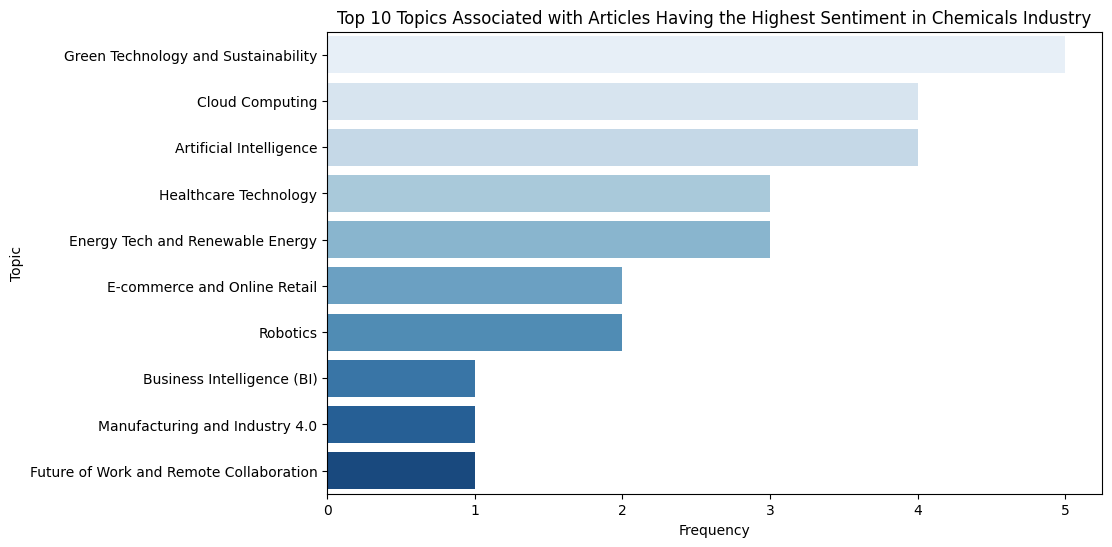

In [ ]:
# Visualize top topics within high sentiment articles in industrial industry
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

def get_chemicals_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Chemicals'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC
            """
        )
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)
        return df

chemicals_industry_sentiment_with_topics_df = get_chemicals_industry_sentiment_with_topics()
top_articles_df = chemicals_industry_sentiment_with_topics_df.head(20)
topics_list = [topic for sublist in top_articles_df['topics'] for topic in sublist]
topic_counts = Counter(topics_list)
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='Blues')
plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment in Chemicals Industry')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()





In [ ]:
def get_chemical_articles_with_keywords():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Chemicals'})
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[:MENTIONS]->(k:Keyword)
            RETURN a.title AS article_title, collect(t.name) AS topics, collect(k.name) AS keywords
            ORDER BY a.title
            LIMIT 20
            """
        )

        data = [{"article_title": record["article_title"], "topics": record["topics"], "keywords": record["keywords"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
chemical_articles_with_keywords_df = get_chemical_articles_with_keywords()
display(chemical_articles_with_keywords_df)



article_title  \
0  AI reduces radiologist workload in mammography...   
1  AgBiome’s Theia Fungicide Selected as ‘Pest Ma...   
2  Axalta Partners With Xaar to Provide Sustainab...   
3  Destroying ‘forever chemicals’ is a technologi...   
4  How Green Pharma Can Cure Disease and (Possibl...   
5            PPG Invests in Global Powder Production   
6  SABIC’S certified renewable polymers help deve...   
7  Salesforce vs. HubSpot: Which CRM Is Right for...   

                                              topics  \
0  [Artificial Intelligence, Artificial Intellige...   
1  [Agriculture Technology (AgriTech), Agricultur...   
2  [Green Technology and Sustainability, Green Te...   
3  [Green Technology and Sustainability, Green Te...   
4  [Green Technology and Sustainability, Green Te...   
5  [Manufacturing and Industry 4.0, Manufacturing...   
6  [Green Technology and Sustainability, Green Te...   
7  [Customer Relationship Management (CRM), Custo...   

                                            keywords  
0                                     [AI, accuracy]  
1  [content, access, response, HTTP, status, requ...  
2  [technology, digital, access, error, response,...  
3  [technology, solutions, sustainability, testin...  
4  [digital transformation, machine learning, cli...  
5  [investment, experience, strategies, access, g...  
6  [innovation, access, error, response, HTTP, st...  
7  [knowledge, insights, advice, content, success...

In [ ]:
def prepare_and_visualize_heatmap():
    df = get_chemical_articles_with_keywords()

    all_topics = []
    all_keywords = []

    for idx, row in df.iterrows():
        for topic in row['topics']:
            for keyword in row['keywords']:
                all_topics.append(topic)
                all_keywords.append(keyword)

    topic_keyword_pairs = list(zip(all_topics, all_keywords))
    pair_counts = Counter(topic_keyword_pairs)

    heatmap_data = pd.DataFrame(pair_counts.items(), columns=['Topic_Keyword', 'Mention_Count'])

    heatmap_data[['Topic', 'Keyword']] = pd.DataFrame(heatmap_data['Topic_Keyword'].tolist(), index=heatmap_data.index)
    heatmap_data = heatmap_data.drop(columns=['Topic_Keyword'])

    pivot_df = heatmap_data.pivot_table(index='Topic', columns='Keyword', values='Mention_Count', aggfunc='sum', fill_value=0)

    X, Y = 15, 20
    top_topics = pivot_df.sum(axis=1).nlargest(X).index
    top_keywords = pivot_df.sum().nlargest(Y).index

    heatmap_df = pivot_df.loc[top_topics, top_keywords]

    fig = px.imshow(heatmap_df,
                    labels=dict(x="Keyword", y="Topic", color="Mention Count"),
                    x=heatmap_df.columns,
                    y=heatmap_df.index,
                    aspect="auto")

    fig.update_xaxes(side="top", tickangle=45)

    fig.update_layout(
        annotations=[
            dict(
                x=0.5, y=-0.2, showarrow=False, text=f'Heatmap of Top {Y} Keywords across Top {X} Topics in the Chemical Industry',
                xref="paper", yref="paper", font=dict(size=16)
            )
        ],
        margin=dict(l=50, r=50, t=50, b=100),
        title_x=0.5
    )

    fig.show()

prepare_and_visualize_heatmap()


# Industry: Aerospace and Defense

In [ ]:
def get_aerospace_defense_industry_sentiment():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Aerospace and Defense'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, a.filepath AS article_filepath
            ORDER BY a.sentiment DESC
            """
        )

        # Convert results to DataFrame
        data = [
            {"article_title": record["article_title"],
             "sentiment": record["sentiment"],
             "publication_date": record["publication_date"],
             "article_filepath": record["article_filepath"]}
            for record in result
        ]
        df = pd.DataFrame(data)

        # Calculate average sentiment
        if not df.empty and "sentiment" in df:
            avg_sentiment = df["sentiment"].mean()
        else:
            avg_sentiment = None

        return df, avg_sentiment

# Usage
aerospace_defense_industry_sentiment_df, average_sentiment = get_aerospace_defense_industry_sentiment()

# Display the DataFrame and average sentiment
display(aerospace_defense_industry_sentiment_df)
print(f"Average Sentiment: {average_sentiment}")


article_title  sentiment  \
0    Exploring the Cosmos: MA College of Engineerin...       0.95   
1    BairesDev Named to Inc.’s 2022 Best in Busines...       0.90   
2          News | College of Health and Human Sciences       0.85   
3    Who is Astrobotic Technology and what do they do?       0.85   
4    KIT Plugins an audio software startup that hel...       0.85   
..                                                 ...        ...   
657  Will there be a criminal investigation over th...      -0.85   
658  Innovation in technology is our future: Rajeev...      -0.85   
659  Innovation in technology is our future: Rajeev...      -0.85   
660  Discord Twitter Reddit and Tumblr have somethi...      -0.85   
661  Discord Twitter Reddit and Tumblr have somethi...      -0.85   

    publication_date                                   article_filepath  
0         2023-10-01  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
1         2022-12-12  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
2         2023-06-06  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
3         2022-12-23  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
4         2023-10-11  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
..               ...                                                ...  
657       2023-06-25  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
658       2023-08-18  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
659       2023-08-18  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
660       2023-06-18  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  
661       2023-06-18  /content/drive/MyDrive/BTT_AI_Tech_News/data/H...  

[662 rows x 4 columns]

Average Sentiment: 0.40120845921450143


In [ ]:
aerospace_defense_industry_sentiment_df.head()

article_title  sentiment  \
0  Exploring the Cosmos: MA College of Engineerin...       0.95   
1  BairesDev Named to Inc.’s 2022 Best in Busines...       0.90   
2        News | College of Health and Human Sciences       0.85   
3  Who is Astrobotic Technology and what do they do?       0.85   
4  KIT Plugins an audio software startup that hel...       0.85   

  publication_date  
0       2023-10-01  
1       2022-12-12  
2       2023-06-06  
3       2022-12-23  
4       2023-10-11

In [ ]:
def get_aerospace_defense_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Aerospace and Defense'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
aerospace_defense_industry_sentiment_with_topics_df = get_aerospace_defense_industry_sentiment_with_topics()
display(aerospace_defense_industry_sentiment_with_topics_df)


article_title  sentiment  \
0    BairesDev Named to Inc.’s 2022 Best in Busines...       0.90   
1          News | College of Health and Human Sciences       0.85   
2    Who is Astrobotic Technology and what do they do?       0.85   
3    KIT Plugins an audio software startup that hel...       0.85   
4    Tokamak Energy Appoints Rolls Royce Leader War...       0.85   
..                                                 ...        ...   
186  Israeli Defense Ministry Company Accused of He...      -0.50   
187  How China Demands Tech Firms Reveal Hackable F...      -0.70   
188  Privacy fears over New Zealand government depa...      -0.70   
189  Utility Threat: The Whole IoT Is At Risk From ...      -0.75   
190  Discord Twitter Reddit and Tumblr have somethi...      -0.85   

    publication_date                                             topics  
0         2022-12-12                           [Digital Transformation]  
1         2023-06-06                            [Healthcare Technology]  
2         2022-12-23           [Robotics, Robotics, Robotics, Robotics]  
3         2023-10-11                          [Artificial Intelligence]  
4         2023-02-23                 [Energy Tech and Renewable Energy]  
..               ...                                                ...  
186       2023-01-16                                    [Cybersecurity]  
187       2023-09-06                                    [Cybersecurity]  
188       2023-04-11                      [Data Privacy and Protection]  
189       2022-12-09                     [5G Technology, 5G Technology]  
190       2023-06-18  [Social Media Platforms, Social Media Platform...  

[191 rows x 4 columns]

<ipython-input-80-bb0c0f75b0fc>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




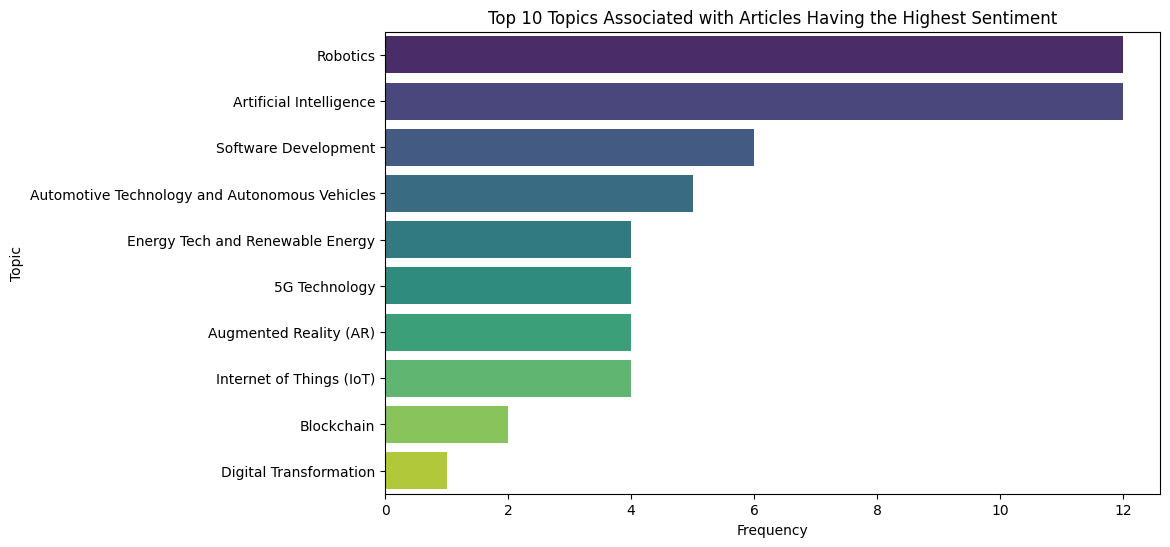

<ipython-input-80-bb0c0f75b0fc>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




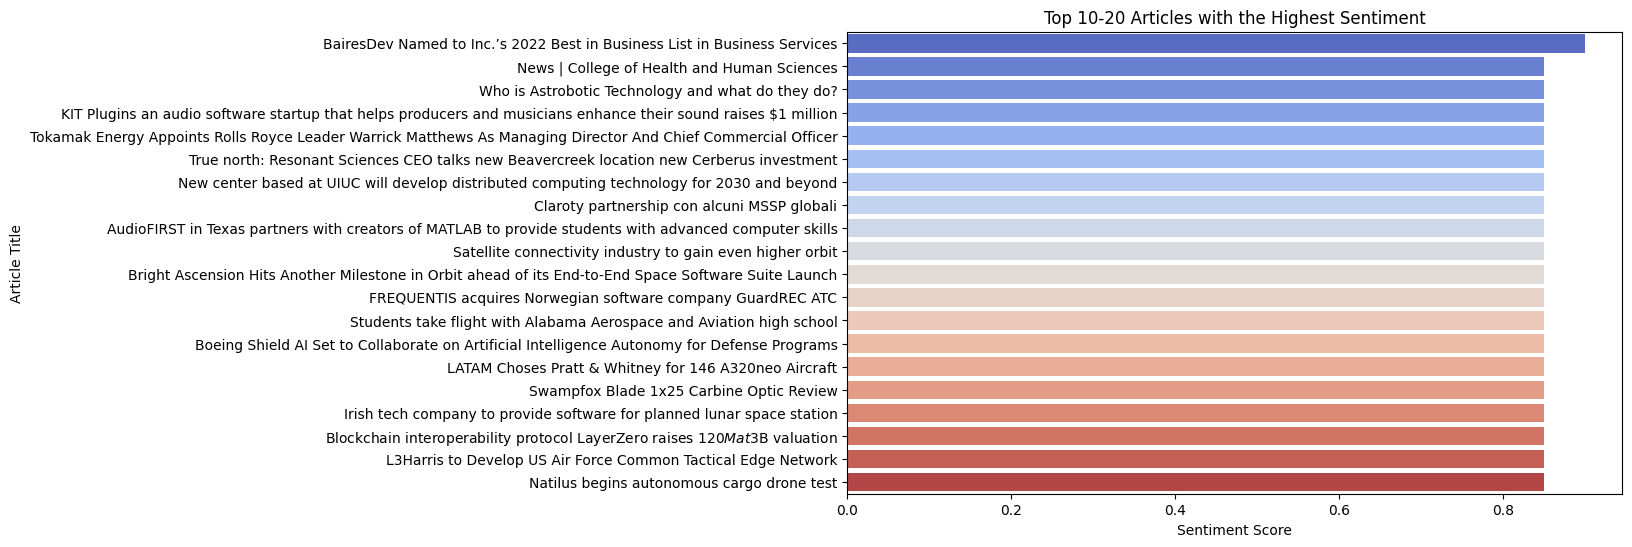

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Assuming the DataFrame is already obtained from the query
aerospace_defense_industry_sentiment_with_topics_df = get_aerospace_defense_industry_sentiment_with_topics()

# Get the top 10-20 articles with the highest sentiment
top_articles_df = aerospace_defense_industry_sentiment_with_topics_df.head(20)

# Step 1: Extract all topics associated with the top articles
topics_list = [topic for sublist in top_articles_df['topics'] for topic in sublist]

# Step 2: Count the frequency of each topic
topic_counts = Counter(topics_list)

# Step 3: Create a DataFrame from the topic counts to display the most common topics
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency'])
topic_counts_df = topic_counts_df.sort_values(by='Frequency', ascending=False)

# Step 4: Plot a bar chart for the most common topics
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='viridis')
plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()

# Step 5: Visualize the sentiment scores of the top 10-20 articles
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='article_title', data=top_articles_df, palette='coolwarm')
plt.title('Top 10-20 Articles with the Highest Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Article Title')
plt.show()


In [ ]:
# Sentiment Analysis on articles involving the chemical industry
def get_energy():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Energy'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date
            ORDER BY a.sentiment DESC
            LIMIT 20
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"], "sentiment": record["sentiment"], "publication_date": record["publication_date"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
energy = get_energy()
display(energy)

article_title  sentiment  \
0   Sustainable Fitch Assigned NaaS Technology the...       0.95   
1   Sustainable Fitch Assigned NaaS Technology the...       0.95   
2   Sustainable Fitch Assigned NaaS Technology the...       0.95   
3   Sustainable Fitch Assigned NaaS Technology the...       0.95   
4   Windpower Monthly Names SANY SE-17260 One of T...       0.90   
5   Windpower Monthly Names SANY SE-17260 One of T...       0.90   
6   Windpower Monthly Names SANY SE-17260 One of T...       0.90   
7   Windpower Monthly Names SANY SE-17260 One of T...       0.90   
8   Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
9   Daffodil Software features in PEAK Matrix® Ass...       0.85   
10  Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
11                  How We Test Products and Services       0.85   
12  Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
13  Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
14  Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
15  UAE Ministry of Investment announces agreement...       0.85   
16  Tokamak Energy Appoints Rolls Royce Leader War...       0.85   
17  Revolution Wind project construction underway ...       0.85   
18  AudioFIRST in Texas partners with creators of ...       0.85   
19                     Mercado Libre appoints new CFO       0.85   

   publication_date  
0        2023-09-22  
1        2023-09-22  
2        2023-09-22  
3        2023-09-22  
4        2023-02-10  
5        2023-02-10  
6        2023-02-10  
7        2023-02-10  
8        2023-10-20  
9        2023-01-13  
10       2023-10-20  
11       2023-06-11  
12       2023-10-20  
13       2023-10-20  
14       2023-10-20  
15       2023-07-19  
16       2023-02-23  
17       2023-05-01  
18       2023-09-07  
19       2023-08-10

In [ ]:
# Visualization for sentiment analysis of chemical industry articles
import plotly.express as px
import pandas as pd

# Remove duplicates by averaging sentiment scores for articles with the same title!
top_10_chemical_articles = (
    energy
    .groupby('article_title', as_index=False)
    .agg({'sentiment': 'mean', 'publication_date': 'first'})
    .sort_values(by='sentiment', ascending=False)
    .head(10)
)

top_10_chemical_articles['article_title'] = pd.Categorical(
    top_10_chemical_articles['article_title'],
    categories=top_10_chemical_articles.sort_values('sentiment', ascending=True)['article_title'],
    ordered=True
)

fig = px.bar(
    top_10_chemical_articles,
    x='sentiment',
    y='article_title',
    orientation='h',
    title="Top 10 Articles in 'Energy' Industry by Average Sentiment Score",
    labels={'sentiment': 'Sentiment Score', 'article_title': 'Article Title'},
    color='sentiment',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis_title="",
    xaxis_title="Sentiment Score",
    xaxis=dict(tickangle=45),
    showlegend=False,
    height=500
)

fig.show()

In [ ]:
def get_articles_and_topics_for_aerospace_and_defense_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Aerospace and Defense'})
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, collect(t.name) AS topics
            ORDER BY a.title
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"], "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
articles_and_topics_df = get_articles_and_topics_for_aerospace_and_defense_industry()
display(articles_and_topics_df)


article_title  \
0    1 Number That Should Worry General Dynamics Sh...   
1    16 network providers win seats on $900M satell...   
2                         2022 - the year in Cloud ERP   
3    2022’s seismic shift in US tech policy will ch...   
4     5 Best Project Management Certifications in 2023   
..                                                 ...   
184  Why everyone is talking about Refik Anadol's A...   
185  Why startups are investing millions to make dr...   
186   Workflow automation startup Parabola raises $24M   
187                                  augmented reality   
188  ‘0ktapus’ hackers are back and targeting tech ...   

                                                topics  
0    [Fintech and Financial Services, Fintech and F...  
1    [Cloud Computing, Cloud Computing, Cloud Compu...  
2                 [Enterprise Resource Planning (ERP)]  
3                         [Tech Policy and Regulation]  
4                               [Software Development]  
..                                                 ...  
184                          [Artificial Intelligence]  
185  [Digital Payments and Fintech, Digital Payment...  
186                [Business Process Automation (BPA)]  
187                           [Augmented Reality (AR)]  
188                                    [Cybersecurity]  

[189 rows x 2 columns]

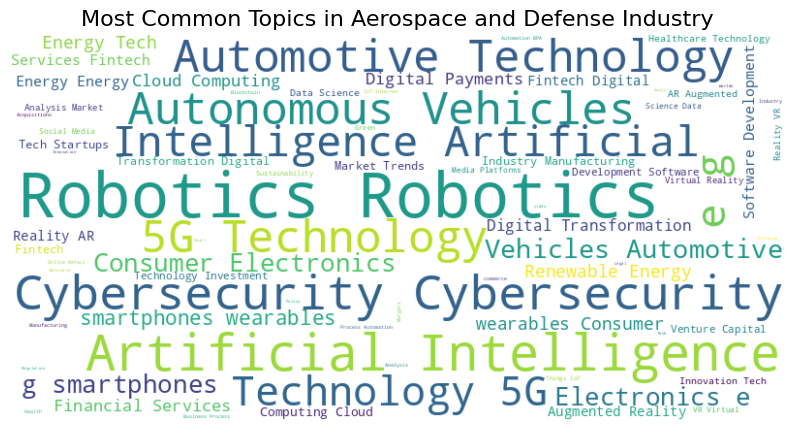

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Assuming articles_and_topics_df is already defined from the query
articles_and_topics_df = get_articles_and_topics_for_aerospace_and_defense_industry()

def plot_topic_wordcloud(df):
    # Extract all topics from the DataFrame and combine them into a single string
    all_topics = ' '.join([topic for sublist in df['topics'] for topic in sublist])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topics)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Topics in Aerospace and Defense Industry', fontsize=16)
    plt.show()

# Usage
plot_topic_wordcloud(articles_and_topics_df)


# Industry: Automotive


In [ ]:

def get_automotive_industry_sentiment():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Automotive'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date as publication_date
            """
        )

        data = [{"article_title": record["article_title"], "sentiment": record["sentiment"], "publication_date": record["publication_date"]} for record in result]
        df = pd.DataFrame(data)

        return df

        # Usage
automotive_industry_sentiment_df = get_automotive_industry_sentiment()
display(automotive_industry_sentiment_df)

article_title  sentiment  \
0    Malaysia issues license to Elon Musk’s Starlin...       0.75   
1    Malaysia issues license to Elon Musk’s Starlin...       0.75   
2    Global Times: President Xi's inspections encou...       0.85   
3    Apple Experts Agree: You Should Delete These i...       0.10   
4    Uber launches teen accounts for rideshare deli...      -0.50   
..                                                 ...        ...   
937  Electric Two Wheeler Sales May 2023 – Ola TVS ...       0.75   
938  Ola Electric & TVS drive E2W sales to 85802 un...       0.75   
939  Electric Two Wheeler Sales May 2023 – Ola TVS ...       0.75   
940  Ola Electric & TVS drive E2W sales to 85802 un...       0.75   
941  Ola Electric & TVS drive E2W sales to 85802 un...       0.75   

    publication_date  
0         2023-07-30  
1         2023-07-30  
2         2023-08-14  
3         2023-08-28  
4         2023-06-26  
..               ...  
937       2023-06-09  
938       2023-04-03  
939       2023-06-09  
940       2023-04-03  
941       2023-04-03  

[942 rows x 3 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

article_title  sentiment  \
0  Groove Ranks #1 in Enterprise Customer Satisfa...       0.95   
1  Board Customer Granarolo Wins Ventana Research...       0.90   
2  BairesDev Named to Inc.’s 2022 Best in Busines...       0.90   
3                             Donkervoort F22 review       0.85   
4  Global Times: President Xi's inspections encou...       0.85   
5  Exotel recognised as the CX contact centre sol...       0.85   
6                       21 Top Venture Capital Firms       0.85   
7  Flutterwave Expands Remittance Capabilities in...       0.85   
8                       21 Top Venture Capital Firms       0.85   
9  Zero Hash appoints former Stripe and Coinbase ...       0.85   

  publication_date  
0       2022-12-13  
1       2023-10-17  
2       2022-12-12  
3       2023-07-28  
4       2023-08-14  
5       2023-09-11  
6       2022-12-14  
7       2023-08-01  
8       2022-12-14  
9       2023-03-28

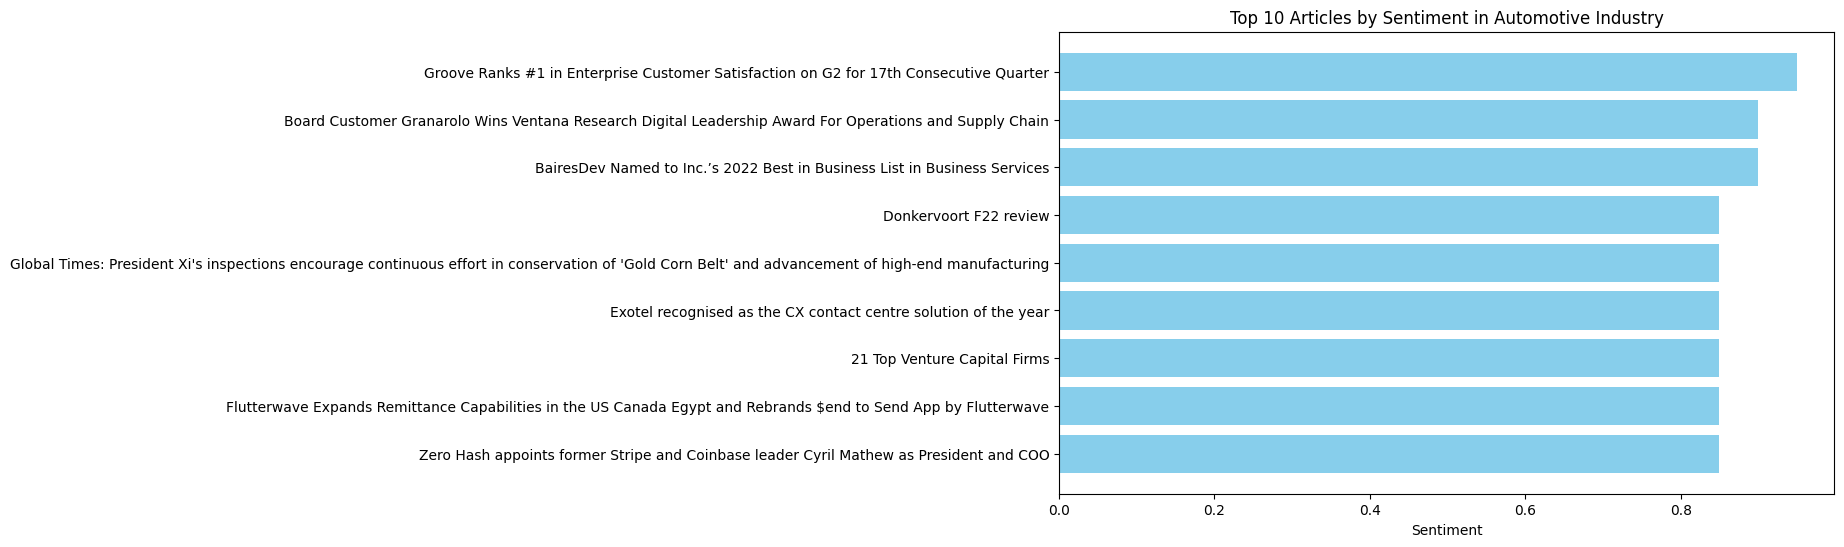

In [ ]:
def get_highest_sentiment_articles():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Automotive'})
            WHERE a.sentiment IS NOT NULL
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date
            ORDER BY a.sentiment DESC
            LIMIT 10
            """
        )

        data = [{"article_title": record["article_title"], "sentiment": record["sentiment"], "publication_date": record["publication_date"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
highest_sentiment_articles_df = get_highest_sentiment_articles()
display(highest_sentiment_articles_df)

# Plot: Bar chart of highest sentiment articles
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(highest_sentiment_articles_df['article_title'], highest_sentiment_articles_df['sentiment'], color='skyblue')
plt.xlabel('Sentiment')
plt.title('Top 10 Articles by Sentiment in Automotive Industry')
plt.gca().invert_yaxis()  # Highest sentiment at the top
plt.show()

In [ ]:
def get_automotive_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Automotive'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC
            """
        )
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Fetch the data
automotive_industry_sentiment_with_topics_df = get_automotive_industry_sentiment_with_topics()


In [ ]:
# Calculate the average sentiment score for the Automotive industry
average_sentiment = automotive_industry_sentiment_with_topics_df['sentiment'].mean()

# Display the average sentiment score
print(f"The average sentiment score for the Automotive industry is: {average_sentiment:.2f}")



The average sentiment score for the Automotive industry is: 0.34


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


<ipython-input-9-18aaede67174>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


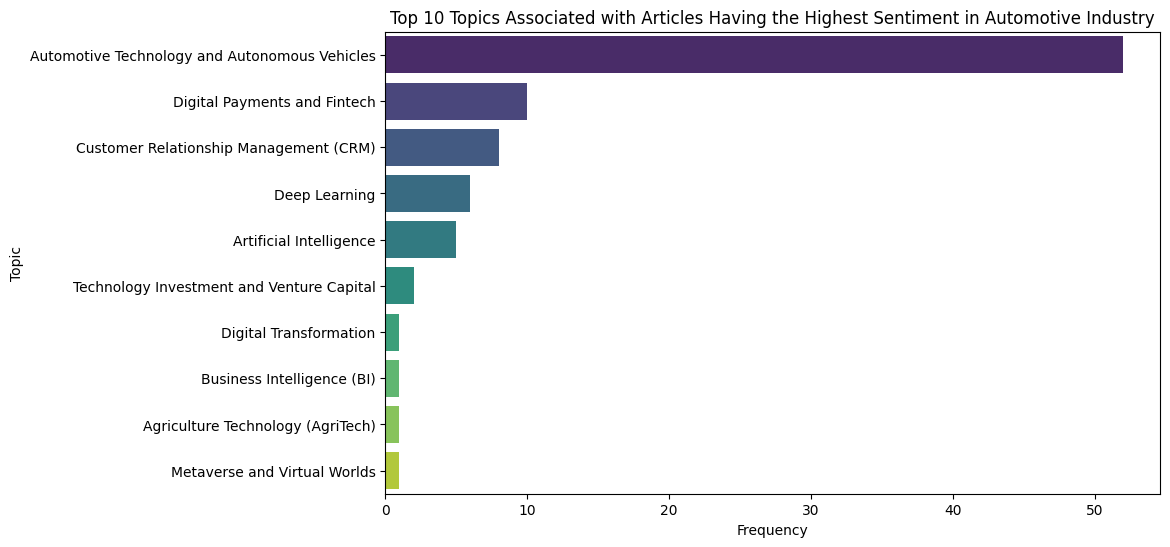

In [ ]:
def get_automotive_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Automotive'})
            WHERE a.sentiment IS NOT NULL
            MATCH (a)-[:HAS_TOPIC]->(t:Topic)
            RETURN a.title AS article_title, a.sentiment AS sentiment, a.publication_date AS publication_date, collect(t.name) AS topics
            ORDER BY a.sentiment DESC
            """
        )
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topics": record["topics"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Fetch the data
automotive_industry_sentiment_with_topics_df = get_automotive_industry_sentiment_with_topics()

# Filter the top 20 articles with the highest sentiment
top_articles_df = automotive_industry_sentiment_with_topics_df.head(20)

# Flatten the list of topics into a single list
topics_list = [topic for sublist in top_articles_df['topics'] for topic in sublist]

# Count the occurrences of each topic
topic_counts = Counter(topics_list)

# Convert the counts to a DataFrame
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))

# Use a custom gradient color palette (purple to green)
custom_palette = sns.color_palette("viridis", len(topic_counts_df.head(10)))

# Plot the data
sns.barplot(
    x='Frequency',
    y='Topic',
    data=topic_counts_df.head(10),
    palette=custom_palette
)

# Add title and labels
plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment in Automotive Industry')
plt.xlabel('Frequency')
plt.ylabel('Topic')

# Show the plot
plt.show()
# Plot the top 10 topics
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='Blues')
# plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment in Automotive Industry')
# plt.xlabel('Frequency')
# plt.ylabel('Topic')
# plt.show()

keyword  mention_count
0              sales             51
1        performance             47
2         technology             44
3               SUVs             42
4               cars             42
5              power             38
6           interior             38
7             growth             36
8             design             34
9       aerodynamics             32
10            market             31
11             range             30
12            safety             30
13          features             30
14  electric vehicle             30
15        challenges             30
16            demand             29
17    sustainability             28
18       development             27
19         aesthetic             27

<ipython-input-86-38af5ec5e3eb>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




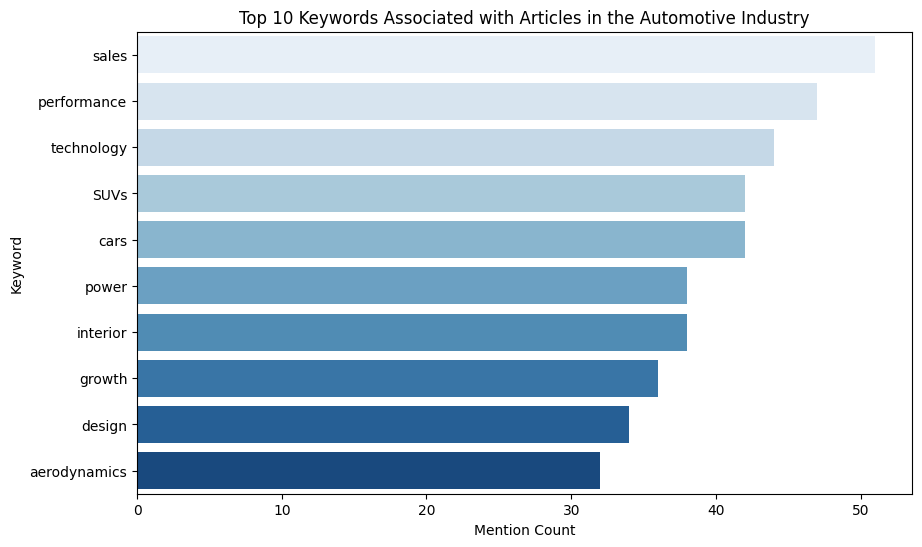

In [ ]:
def get_keywords_for_automotive_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            MATCH (a)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Automotive'})
            RETURN k.name AS keyword, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 20
            """
        )
        data = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

keywords_for_automotive_df = get_keywords_for_automotive_industry()
display(keywords_for_automotive_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='mention_count', y='keyword', data=keywords_for_automotive_df.head(10), palette='Blues')
plt.title('Top 10 Keywords Associated with Articles in the Automotive Industry')
plt.xlabel('Mention Count')
plt.ylabel('Keyword')
plt.show()

- We decided to focus on this word (ask chat gpt for a word that combines these 5 industries)
- For these 5 industries, these are the average sentiment scores
- As you can see, this industry has the highest sentiment
- We recommend that Accenture focus on projects relating to this industry because this is what people are the most excited about
- Within the aerospace industry, people seem to be the most excited by this -- (look at the top 10 sentiment articles)
- Within the energy industry, people seem to be the most excited by this...
- Overall, people seem to be the most excited by this




# Industry: Energy


## relationships

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# view graph schema
def get_graph_schema():
    with driver.session() as session:
        # Run the APOC procedure to get the schema
        result = session.run(
            """
            CALL db.relationshipTypes()
            """
        )
        # Extract the schema information
        schema = pd.DataFrame(result)
        return schema

# Usage
graph_schema = get_graph_schema()
display(graph_schema)

0
0              MENTIONS
1             HAS_TOPIC
2   BELONGS_TO_INDUSTRY
3               USED_BY
4            RELATED_TO
5       AFFILIATED_WITH
6          DEVELOPED_BY
7         REPLACED_WITH
8                  USES
9              PROVIDES
10          REPLACED_BY
11              DONATES

## Frequency analysis

In [ ]:
def get_article_count_by_topic_in_energy():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            WHERE i.name = 'Energy'
            RETURN t.name AS topic_name, COUNT(a) AS article_count
            ORDER BY article_count DESC
            """
        )
        data = [{"topic_name": record["topic_name"], "article_count": record["article_count"]} for record in result]
        return pd.DataFrame(data)

# Usage
article_count_by_topic_in_energy_df = get_article_count_by_topic_in_energy()

In [ ]:
top_20_topics = article_count_by_topic_in_energy_df.head(20)
top_20_topics

topic_name  article_count
0                    Energy Tech and Renewable Energy            226
1                             Artificial Intelligence             31
2                 Green Technology and Sustainability             24
3                        Digital Payments and Fintech             15
4       Automotive Technology and Autonomous Vehicles             15
5           Technology Investment and Venture Capital             14
6                                       Cybersecurity             11
7                      Fintech and Financial Services             11
8   Consumer Electronics (e.g., smartphones, weara...              9
9                                     Cloud Computing              9
10                         Market Trends and Analysis              8
11                                           Robotics              7
12                               Software Development              6
13                             Digital Transformation              6
14                             Social Media Platforms              5
15                  Agriculture Technology (AgriTech)              5
16                                      5G Technology              4
17                       Tech Startups and Innovation              4
18                            Supply Chain Management              4
19                   Mergers and Acquisitions in Tech              3

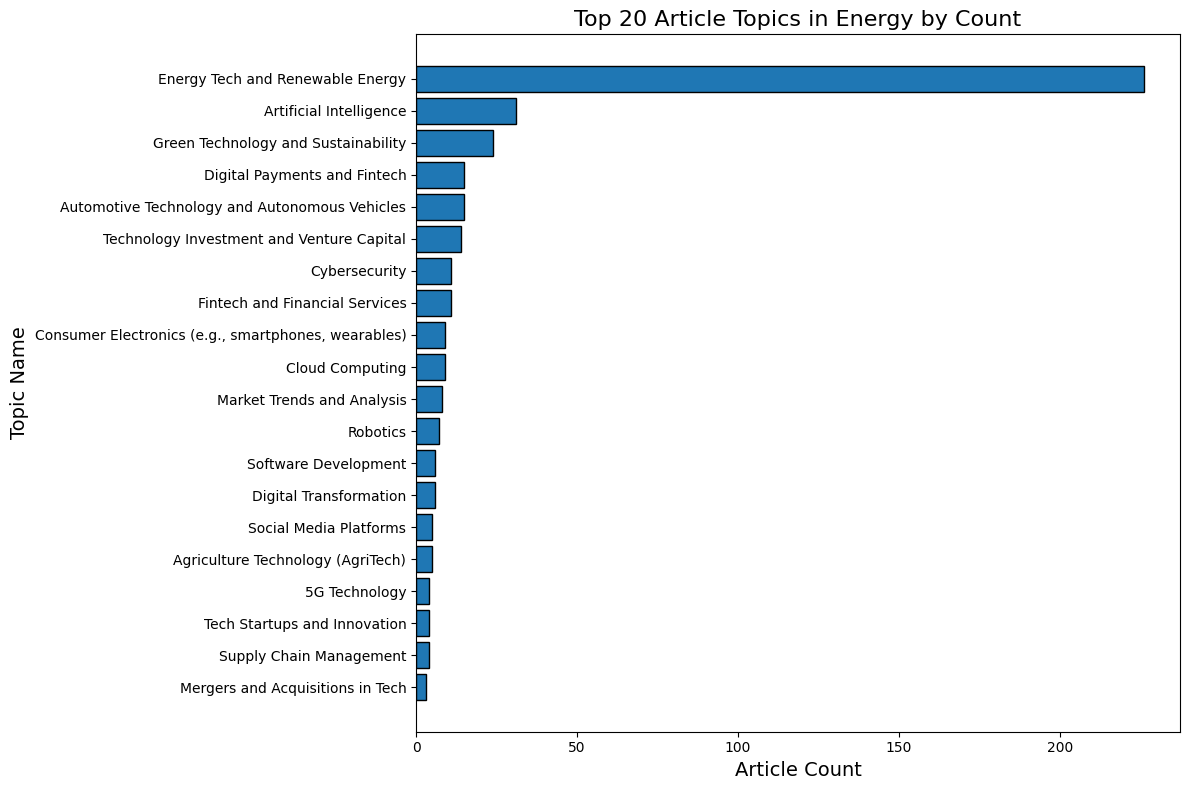

In [ ]:
# Plot top 20:
plt.figure(figsize=(12, 8))
plt.barh(top_20_topics['topic_name'], top_20_topics['article_count'], edgecolor='black')
plt.xlabel('Article Count', fontsize=14)
plt.ylabel('Topic Name', fontsize=14)
plt.title('Top 20 Article Topics in Energy by Count', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top
plt.tight_layout()
plt.show()

## Sentiment Analysis of Articles by topic/time/keyword

###topic

In [ ]:
def get_energy_industry_sentiment_with_topics():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Energy'})
            WHERE a.sentiment IS NOT NULL
            RETURN DISTINCT a.title AS article_title,
                            a.sentiment AS sentiment,
                            a.publication_date AS publication_date,
                            t.name AS topic_name
            ORDER BY a.sentiment DESC
            """
        )

        # Convert results to DataFrame
        data = [{"article_title": record["article_title"],
                 "sentiment": record["sentiment"],
                 "publication_date": record["publication_date"],
                 "topic_name": record["topic_name"]} for record in result]

        df = pd.DataFrame(data)
        return df

# Usage
energy_industry_sentiment_with_topics_df = get_energy_industry_sentiment_with_topics()
display(energy_industry_sentiment_with_topics_df)

article_title  sentiment  \
0    Sustainable Fitch Assigned NaaS Technology the...       0.95   
1    Windpower Monthly Names SANY SE-17260 One of T...       0.90   
2    Tokamak Energy Appoints Rolls Royce Leader War...       0.85   
3    Daffodil Software features in PEAK Matrix® Ass...       0.85   
4                    How We Test Products and Services       0.85   
..                                                 ...        ...   
177   Natural Disasters & Facebook’s Information Scrub      -0.75   
178   Auto jobs are booming in the union-hostile South      -0.75   
179                                        Environment      -0.75   
180         Data from WEST to optimize ITER's divertor      -0.80   
181  Wednesday's Top Wall Street Analyst Upgrades a...      -0.80   

    publication_date                                         topic_name  
0         2023-09-22                   Energy Tech and Renewable Energy  
1         2023-02-10                   Energy Tech and Renewable Energy  
2         2023-02-23                   Energy Tech and Renewable Energy  
3         2023-01-13                               Software Development  
4         2023-06-11  Consumer Electronics (e.g., smartphones, weara...  
..               ...                                                ...  
177       2023-09-02                             Social Media Platforms  
178       2023-09-20      Automotive Technology and Autonomous Vehicles  
179       2023-09-26                Green Technology and Sustainability  
180       2023-06-12                                      Cybersecurity  
181       2023-09-06                         Market Trends and Analysis  

[182 rows x 4 columns]

In [ ]:
# top 10 articles with positive sentiment
top10_positive_sentiment_article = energy_industry_sentiment_with_topics_df[energy_industry_sentiment_with_topics_df["sentiment"] >= 0.85]
top10_positive_sentiment_article

article_title  sentiment  \
0   Sustainable Fitch Assigned NaaS Technology the...       0.95   
1   Windpower Monthly Names SANY SE-17260 One of T...       0.90   
2   Tokamak Energy Appoints Rolls Royce Leader War...       0.85   
3   Daffodil Software features in PEAK Matrix® Ass...       0.85   
4                   How We Test Products and Services       0.85   
5   HighRadius Named a Leader in the 2023 Gartner®...       0.85   
6   New York State of Wind: Future Looks Breezy fo...       0.85   
7   KIT Plugins an audio software startup that hel...       0.85   
8                      Mercado Libre appoints new CFO       0.85   
9   Revolution Wind project construction underway ...       0.85   
10  UAE Ministry of Investment announces agreement...       0.85   
11  AudioFIRST in Texas partners with creators of ...       0.85   
12  Top 9 Best-Performing Oil Stocks for Your Port...       0.85   
13  US Department of Energy launches clean energy ...       0.85   
14      Indian Electrical Machinery Industry Analysis       0.85   
15  Reliance AGM 2023: From Jio True5G to Jio Smar...       0.85   
16  RIL partners with Brookfield Infrastructure an...       0.85   
17  Navistar Reveals International® SuperTruck II ...       0.85   
18  Technology Ventures Inventor Spotlight: Xiangb...       0.85   
19  Daimler SuperTruck II showcases the future of ...       0.85   
20  Vard Electro to Deliver SeaQ Energy Storage Sy...       0.85   
21  Chinese XPeng P7 And G9 Ready To Conquer Europ...       0.85   
22  Arizona's Explosive Growth in Jobs and Manufac...       0.85   
23  Hitachi Energy the partner of choice for large...       0.85   
24  J.P. Morgan Chase Bank Arranges First Solar’s ...       0.85   
25      This Week 19 Companies Raised $870.4 Million.       0.85   
26                   AI And The Channel: It’s Go Time       0.85   
27  MaC Venture Capital hires TCG veteran Jennifer...       0.85   
28  bp Completes Acquisition of TravelCenters of A...       0.85   
29  Over 40 major firms pledge to hire train over ...       0.85   
30  Enterprise starts service at 6th Midland Basin...       0.85   
31  FTC Solar Unveils Tracker-Agnostic SUNOPS Soft...       0.85   
32                            Making buildings better       0.85   
33  Global Energy and Chemical Leaders Partner to ...       0.85   
34  FinanzDesk and Eguana Partner to Bring Energy ...       0.85   
35    First Gen powers seven facilities of PLDT Smart       0.85   
36      Anglo American combines nuGen with First Mode       0.85   
37  MAHLE Aims to Lead in E-Mobility as System Cha...       0.85   
38  MK Land plans more solar farms after Kerian so...       0.85   
39  NordicNinja Europe’s Largest Japanese VC Annou...       0.85   

   publication_date                                         topic_name  
0        2023-09-22                   Energy Tech and Renewable Energy  
1        2023-02-10                   Energy Tech and Renewable Energy  
2        2023-02-23                   Energy Tech and Renewable Energy  
3        2023-01-13                               Software Development  
4        2023-06-11  Consumer Electronics (e.g., smartphones, weara...  
5        2023-05-08                            Artificial Intelligence  
6        2023-01-27                   Energy Tech and Renewable Energy  
7        2023-10-11                            Artificial Intelligence  
8        2023-08-10                       Digital Payments and Fintech  
9        2023-05-01                   Energy Tech and Renewable Energy  
10       2023-07-19                   Energy Tech and Renewable Energy  
11       2023-09-07                                           Robotics  
12       2023-10-20                   Energy Tech and Renewable Energy  
13       2023-03-25                   Energy Tech and Renewable Energy  
14       2023-03-07                   Energy Tech and Renewable Energy  
15       2023-08-28                                      5G Technology  
16       2

In [ ]:
top_negative_sent_articles = energy_industry_sentiment_with_topics_df[energy_industry_sentiment_with_topics_df["sentiment"] <= -0.50]
top_negative_sent_articles

article_title  sentiment  \
172  ‘0ktapus’ hackers are back and targeting tech ...      -0.50   
173                Electricity rates in Valley to soar      -0.50   
174  PHONO Debuts New Products and Localized Renewa...      -0.50   
175  Meyer Burger to establish solar cell manufactu...      -0.50   
176  How China Demands Tech Firms Reveal Hackable F...      -0.70   
177   Natural Disasters & Facebook’s Information Scrub      -0.75   
178   Auto jobs are booming in the union-hostile South      -0.75   
179                                        Environment      -0.75   
180         Data from WEST to optimize ITER's divertor      -0.80   
181  Wednesday's Top Wall Street Analyst Upgrades a...      -0.80   

    publication_date                                     topic_name  
172       2023-02-02                                  Cybersecurity  
173       2023-05-28               Energy Tech and Renewable Energy  
174       2023-09-18               Energy Tech and Renewable Energy  
175       2023-07-24               Energy Tech and Renewable Energy  
176       2023-09-06                                  Cybersecurity  
177       2023-09-02                         Social Media Platforms  
178       2023-09-20  Automotive Technology and Autonomous Vehicles  
179       2023-09-26            Green Technology and Sustainability  
180       2023-06-12                                  Cybersecurity  
181       2023-09-06                     Market Trends and Analysis

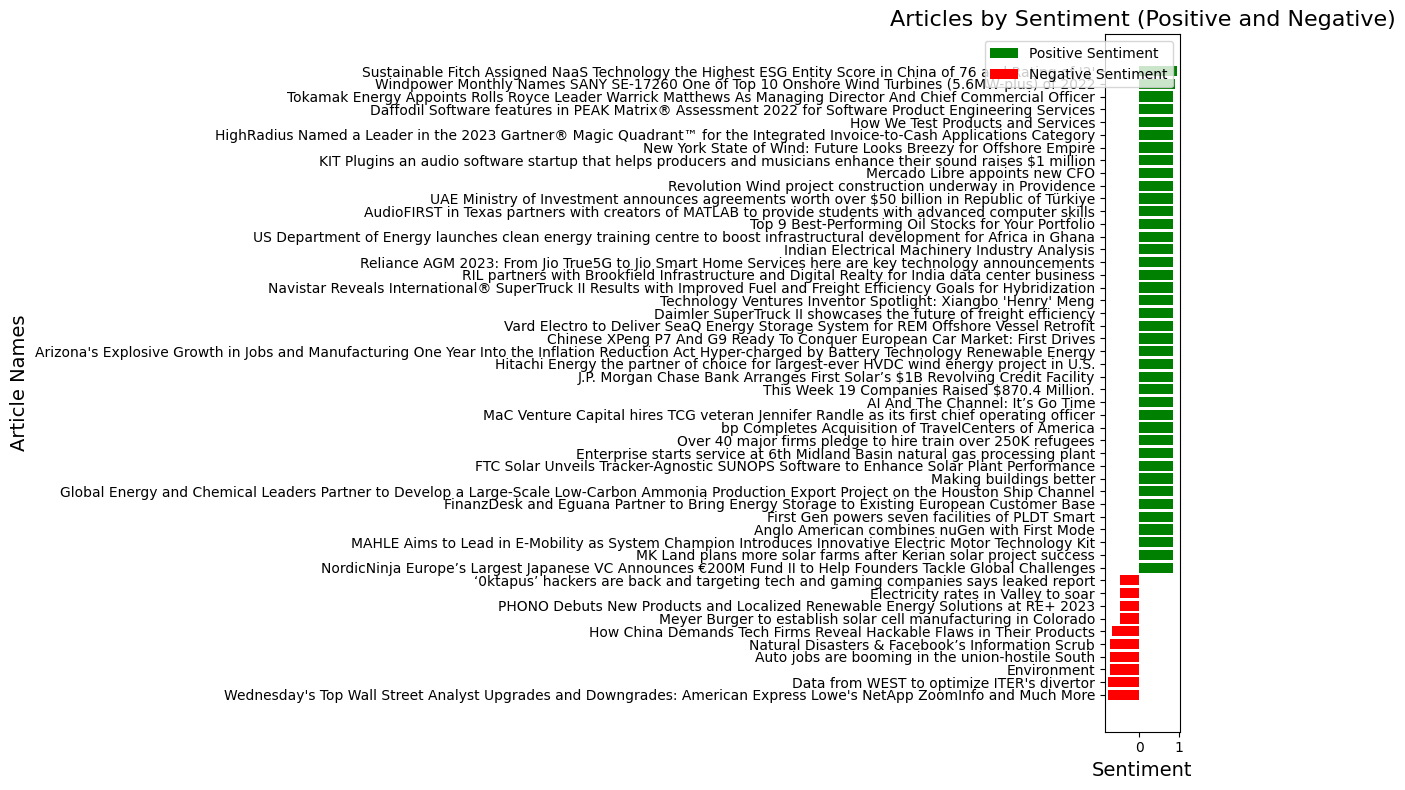

In [ ]:
# Plot 1: Article names by sentiment (positive and negative)
def plot_article_names_by_sentiment(positive_df, negative_df):
    plt.figure(figsize=(12, 8))
    plt.barh(positive_df['article_title'], positive_df['sentiment'], color='green', label='Positive Sentiment')
    plt.barh(negative_df['article_title'], negative_df['sentiment'], color='red', label='Negative Sentiment')
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Article Names', fontsize=14)
    plt.title('Articles by Sentiment (Positive and Negative)', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

plot_article_names_by_sentiment(top10_positive_sentiment_article, top_negative_sent_articles)

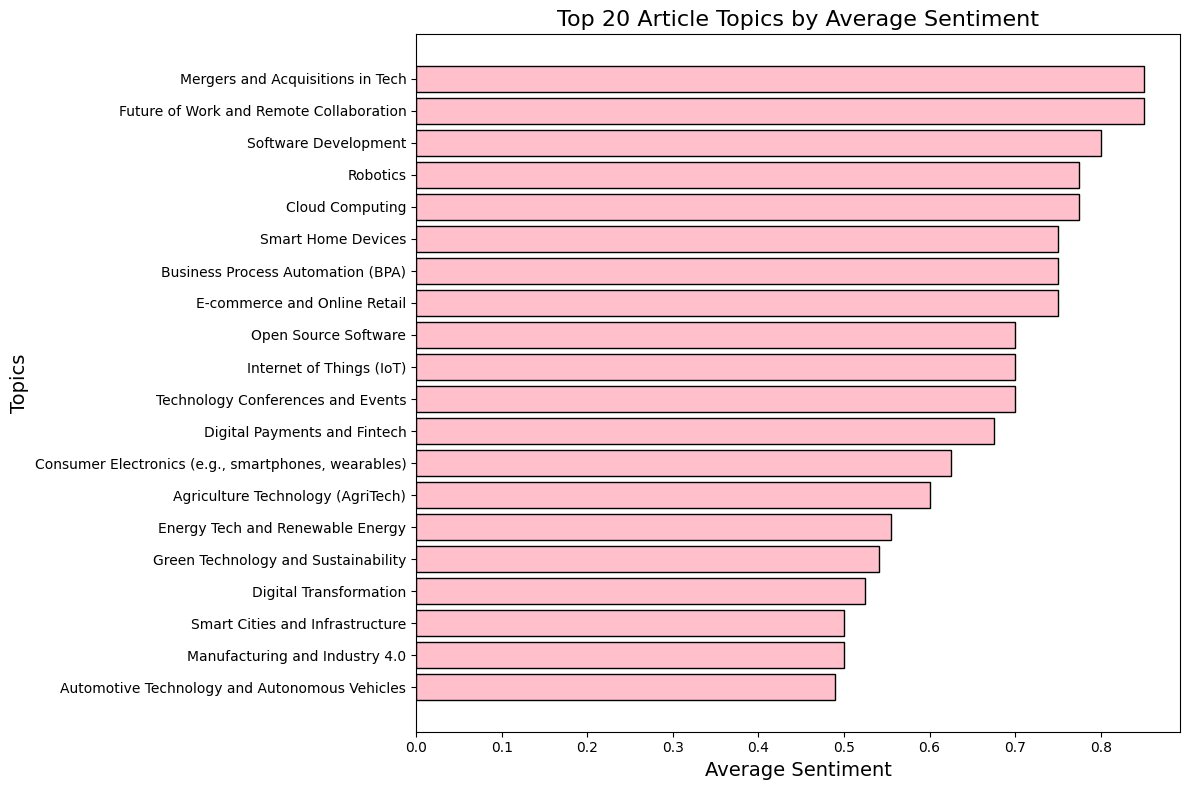

In [ ]:
def plot_article_topics_by_avg_sentiment(df):
    avg_sentiment_by_topic = df.groupby('topic_name')['sentiment'].mean().sort_values(ascending=False).head(20)
    plt.figure(figsize=(12, 8))
    plt.barh(avg_sentiment_by_topic.index, avg_sentiment_by_topic.values, edgecolor='black', color="pink")
    plt.xlabel('Average Sentiment', fontsize=14)
    plt.ylabel('Topics', fontsize=14)
    plt.title('Top 20 Article Topics by Average Sentiment', fontsize=16)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

plot_article_topics_by_avg_sentiment(energy_industry_sentiment_with_topics_df)

In [ ]:
# Visualization for sentiment analysis of chemical industry articles
import plotly.express as px
import pandas as pd

# Remove duplicates by averaging sentiment scores for articles with the same title!
top_10_chemical_articles = (

    .groupby('article_title', as_index=False)
    .agg({'sentiment': 'mean', 'publication_date': 'first'})
    .sort_values(by='sentiment', ascending=False)
    .head(10)
)

top_10_chemical_articles['article_title'] = pd.Categorical(
    top_10_chemical_articles['article_title'],
    categories=top_10_chemical_articles.sort_values('sentiment', ascending=True)['article_title'],
    ordered=True
)

fig = px.bar(
    top_10_chemical_articles,
    x='sentiment',
    y='article_title',
    orientation='h',
    title="Top 10 Articles in 'Energy' Industry by Average Sentiment Score",
    labels={'sentiment': 'Sentiment Score', 'article_title': 'Article Title'},
    color='sentiment',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis_title="",
    xaxis_title="Sentiment Score",
    xaxis=dict(tickangle=45),
    showlegend=False,
    height=500
)

fig.show()



<ipython-input-7-7d718e1c296d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='viridis')


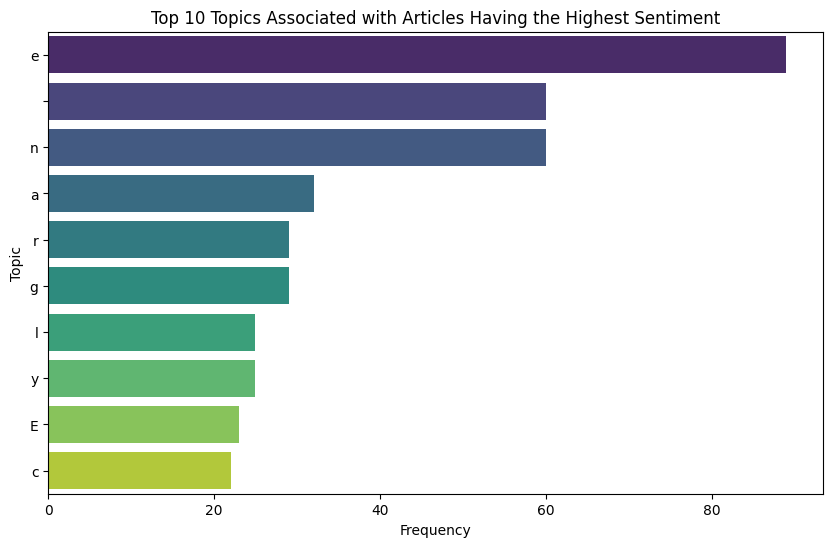

<ipython-input-7-7d718e1c296d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='article_title', data=top_articles_df, palette='coolwarm')


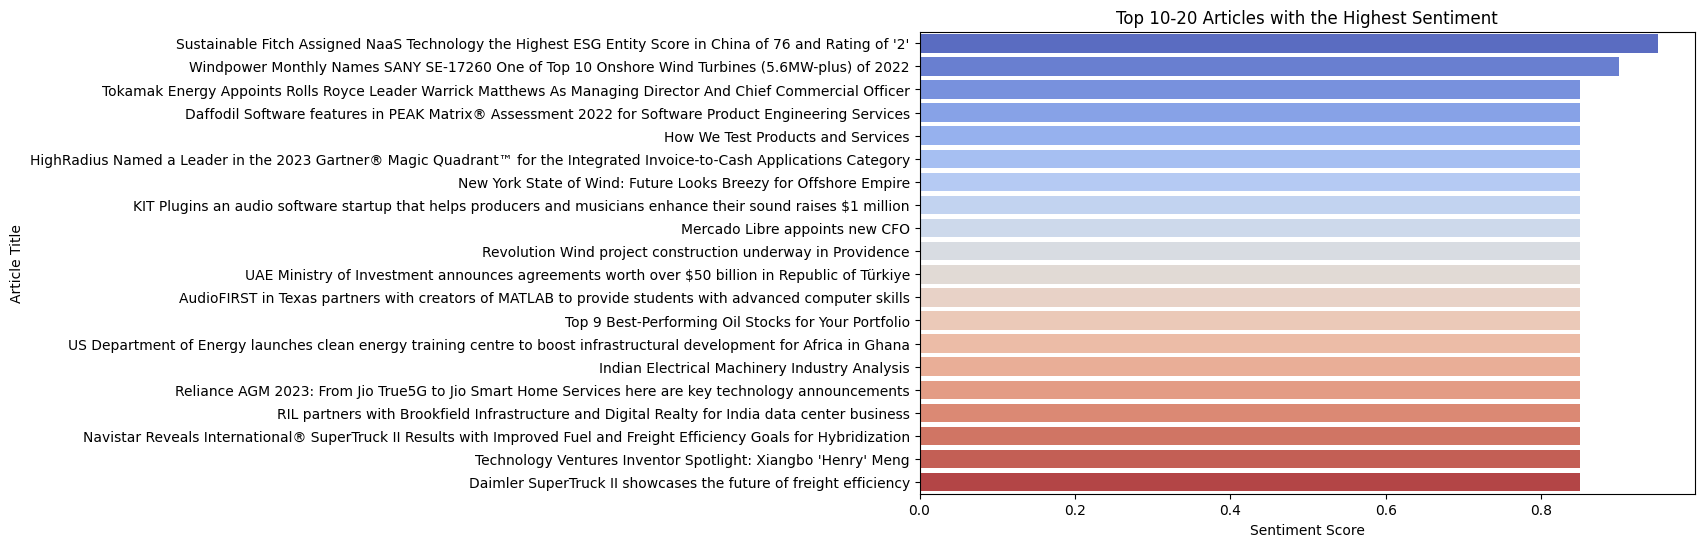

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Get the top 10-20 articles with the highest sentiment
top_articles_df = energy_industry_sentiment_with_topics_df.head(20)

# Step 1: Extract all topics associated with the top articles
topics_list = [topic for sublist in top_articles_df['topic_name'] for topic in sublist]

# Step 2: Count the frequency of each topic
topic_counts = Counter(topics_list)

# Step 3: Create a DataFrame from the topic counts to display the most common topics
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency'])
topic_counts_df = topic_counts_df.sort_values(by='Frequency', ascending=False)

# Step 4: Plot a bar chart for the most common topics
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Topic', data=topic_counts_df.head(10), palette='viridis')
plt.title('Top 10 Topics Associated with Articles Having the Highest Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()

# Step 5: Visualize the sentiment scores of the top 10-20 articles
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='article_title', data=top_articles_df, palette='coolwarm')
plt.title('Top 10-20 Articles with the Highest Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Article Title')
plt.show()


### frequency distribution

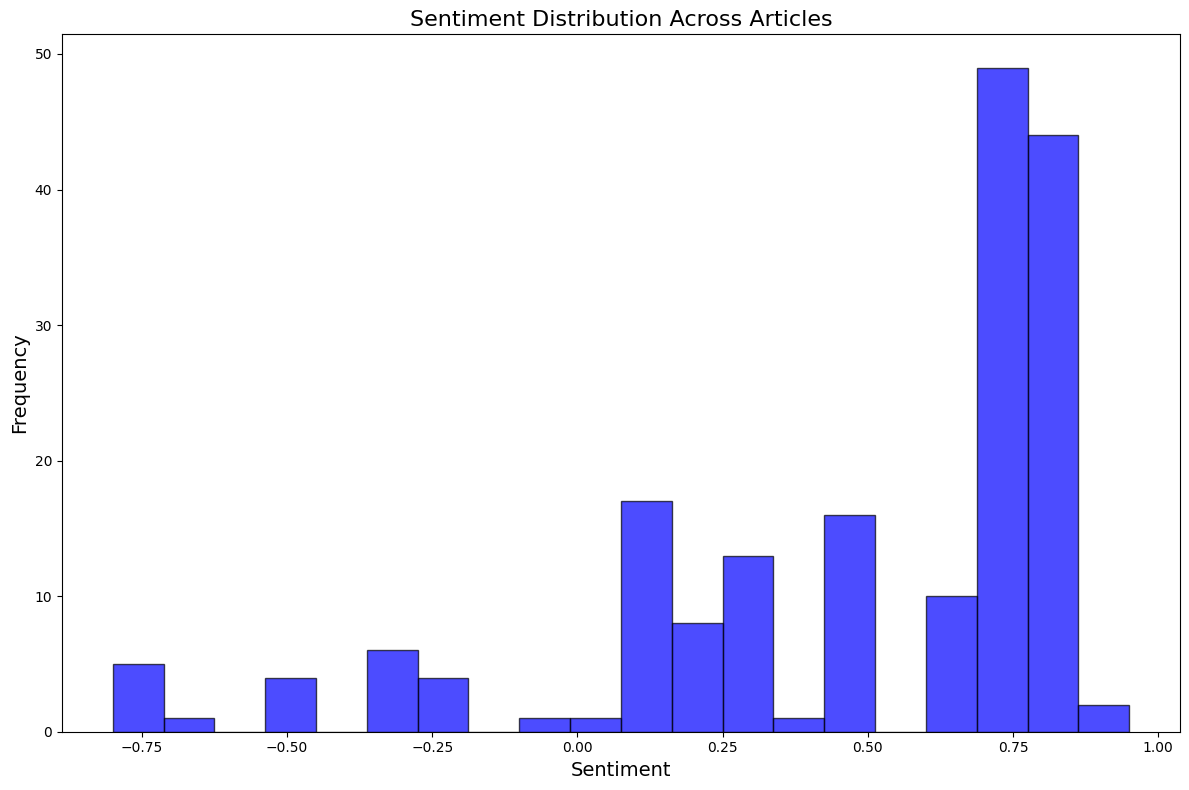

In [ ]:
def plot_sentiment_distribution(df):
    plt.figure(figsize=(12, 8))
    plt.hist(df['sentiment'], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Sentiment Distribution Across Articles', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(energy_industry_sentiment_with_topics_df)

### time

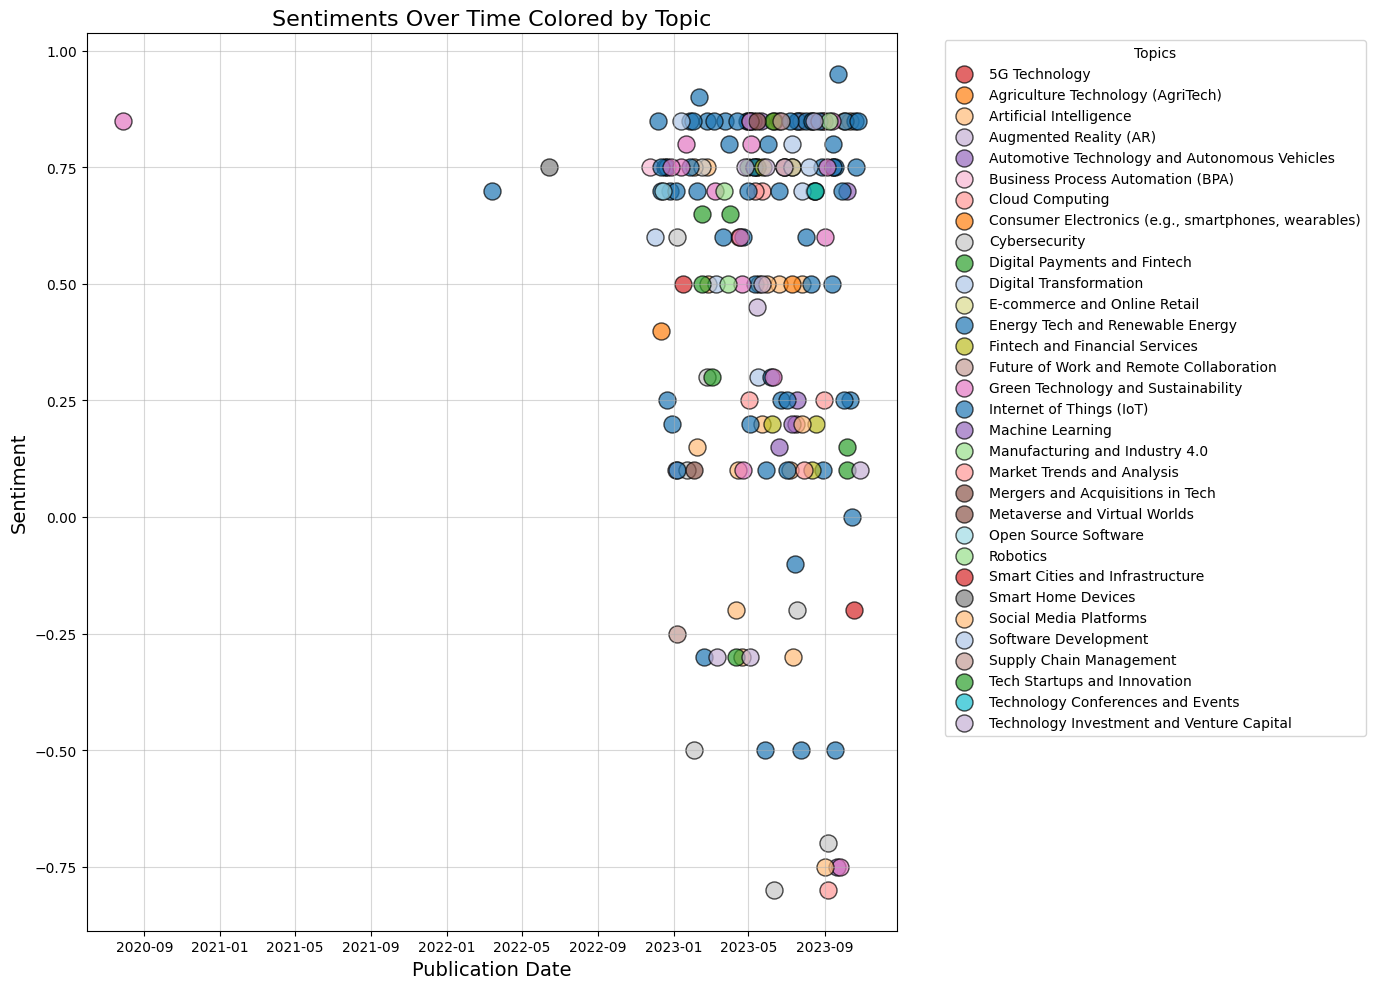

In [ ]:
# Preprocess the DataFrame to convert Neo4j dates to pandas datetime
def preprocess_publication_date(df):
    df['publication_date'] = df['publication_date'].apply(lambda x: pd.to_datetime(str(x)))
    return df
energy_industry_sentiment_with_topics_df = preprocess_publication_date(energy_industry_sentiment_with_topics_df)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assign a unique color to each topic using seaborn color palette
unique_topics = energy_industry_sentiment_with_topics_df['topic_name'].unique()
topic_colors = {topic: color for topic, color in zip(unique_topics, sns.color_palette("tab20", len(unique_topics)))}

# Plot Sentiments Over Time Colored by Topic
def plot_sentiments_over_time_colored_by_topic(df):
    plt.figure(figsize=(14, 10))
    for topic, group in df.groupby('topic_name'):
        plt.scatter(
            pd.to_datetime(group['publication_date']),
            group['sentiment'],
            alpha=0.7,
            edgecolors='black',
            label=topic,
            color=topic_colors[topic],
                s=150
        )
    plt.xlabel('Publication Date', fontsize=14)
    plt.ylabel('Sentiment', fontsize=14)
    plt.title('Sentiments Over Time Colored by Topic', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Topics", fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Call the function
plot_sentiments_over_time_colored_by_topic(energy_industry_sentiment_with_topics_df)

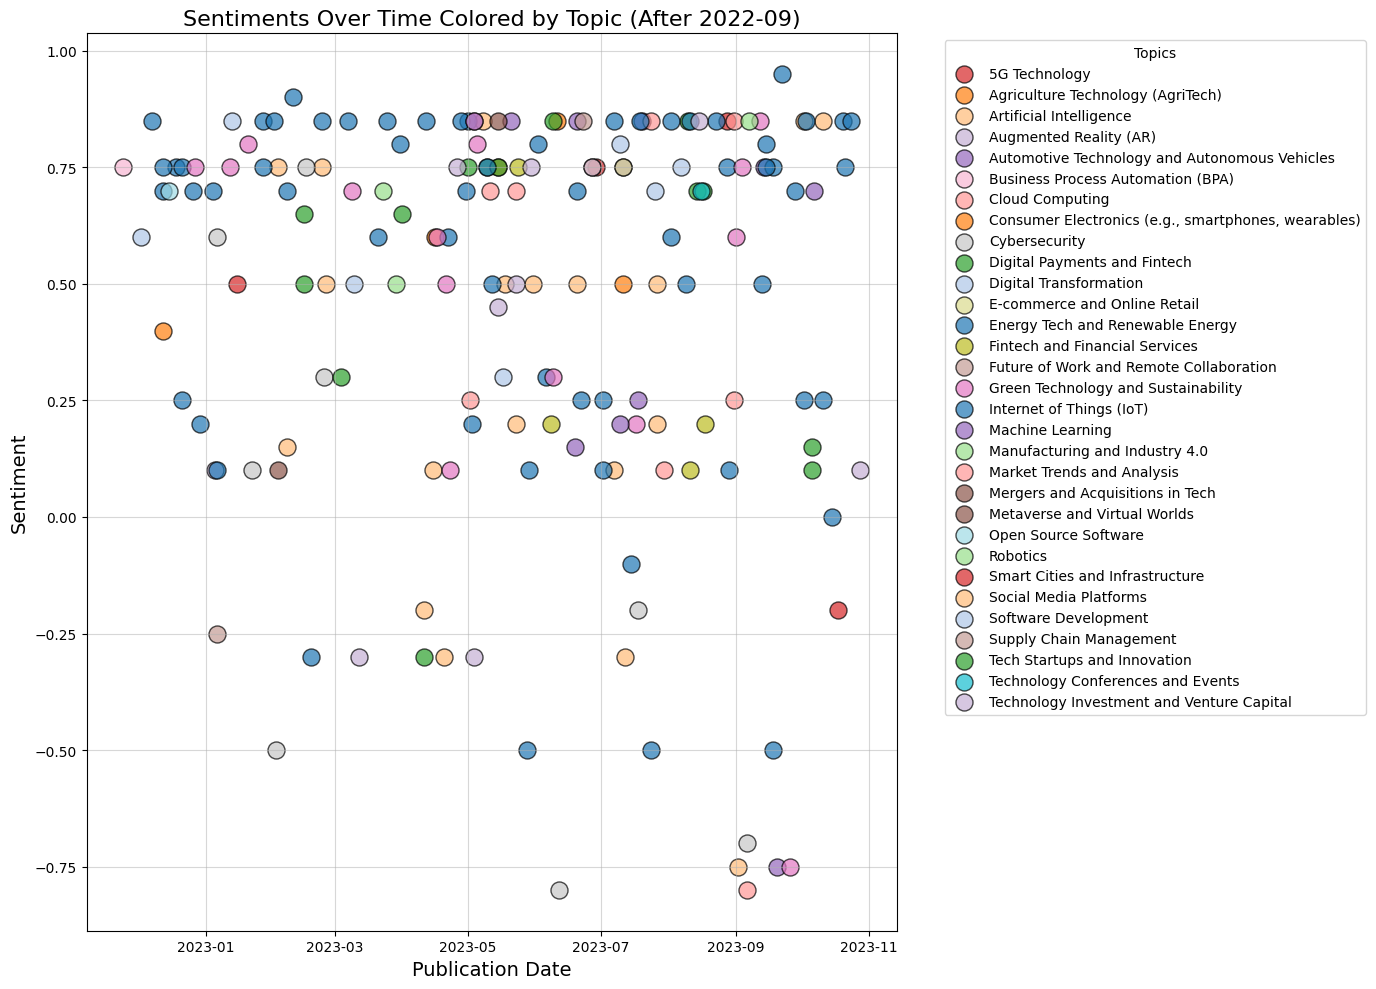

In [ ]:
import datetime

# Filter DataFrame to include only articles published after 2022-09
def filter_articles_after_date(df, date_str):
    cutoff_date = pd.to_datetime(date_str)
    return df[df['publication_date'] > cutoff_date]
filtered_df = filter_articles_after_date(energy_industry_sentiment_with_topics_df, '2022-09-01')

# Plot Sentiments Over Time Colored by Topic after 2022-09
def plot_sentiments_over_time_colored_by_topic(df):
    plt.figure(figsize=(14, 10))
    for topic, group in df.groupby('topic_name'):
        plt.scatter(
            pd.to_datetime(group['publication_date']),
            group['sentiment'],
            alpha=0.7,
            edgecolors='black',
            label=topic,
            color=topic_colors[topic],
                s=150
        )
    plt.xlabel('Publication Date', fontsize=14)
    plt.ylabel('Sentiment', fontsize=14)
    plt.title('Sentiments Over Time Colored by Topic (After 2022-09)', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Topics", fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_sentiments_over_time_colored_by_topic(filtered_df)

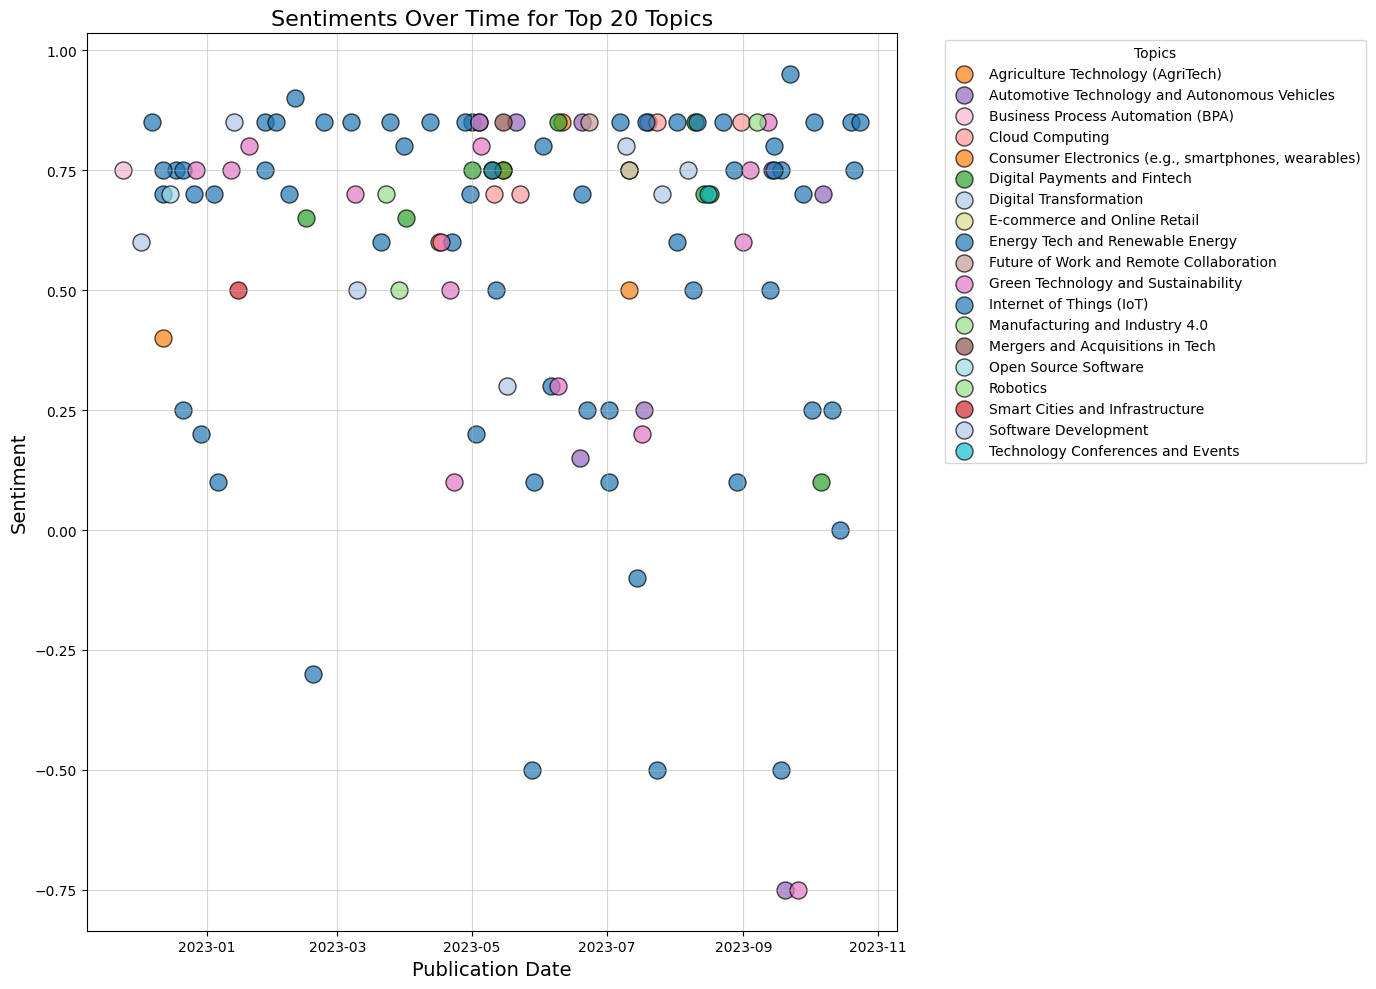

In [ ]:
# Get the top 20 topics by average sentiment
top_20_topics = (
    energy_industry_sentiment_with_topics_df.groupby('topic_name')['sentiment']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Filter the DataFrame to include only rows with the top 20 topics
filtered_topics_df = energy_industry_sentiment_with_topics_df[
    energy_industry_sentiment_with_topics_df['topic_name'].isin(top_20_topics)
]

def filter_articles_after_date(df, date_str):
    cutoff_date = pd.to_datetime(date_str)
    return df[df['publication_date'] > cutoff_date]
filtered_df = filter_articles_after_date(filtered_topics_df, '2022-09-01')

# Plot Sentiments Over Time for Top 20 Topics
def plot_sentiments_over_time_for_top_topics(df, top_topics):
    plt.figure(figsize=(14, 10))
    for topic, group in df.groupby('topic_name'):
        if topic in top_topics:
            plt.scatter(
                pd.to_datetime(group['publication_date']),
                group['sentiment'],
                alpha=0.7,
                edgecolors='black',
                label=topic,
                color=topic_colors[topic],
                s=150

            )
    plt.xlabel('Publication Date', fontsize=14)
    plt.ylabel('Sentiment', fontsize=14)
    plt.title('Sentiments Over Time for Top 20 Topics', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Topics", fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Call the function with the filtered DataFrame
plot_sentiments_over_time_for_top_topics(filtered_df, top_20_topics)


### keyword/ keyword co-occurrance

In [ ]:
def get_mentions_of_keywords_by_topic_in_energy():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic),
                  (a)-[:MENTIONS]->(k:Keyword),
                  (a)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Energy'})
            RETURN t.name AS topic_name,
                   k.name AS keyword,
                   COUNT(a) AS mention_count
            ORDER BY topic_name, mention_count DESC
            """
        )
        # Convert results to DataFrame
        data = [
            {"topic_name": record["topic_name"],
             "keyword": record["keyword"],
             "mention_count": record["mention_count"]}
            for record in result
        ]
        df = pd.DataFrame(data)
        return df

# Usage
mentions_of_keywords_by_topic_in_energy_df = get_mentions_of_keywords_by_topic_in_energy()
display(mentions_of_keywords_by_topic_in_energy_df)

topic_name        keyword  mention_count
0                      Artificial Intelligence         repair              3
1                      Artificial Intelligence         growth              2
2                      Artificial Intelligence  mental health              2
3                      Artificial Intelligence             AI              2
4                      Artificial Intelligence          range              2
..                                         ...            ...            ...
260  Technology Investment and Venture Capital  entrepreneurs              2
261  Technology Investment and Venture Capital          funds              2
262  Technology Investment and Venture Capital  participatory              2
263  Technology Investment and Venture Capital   billionaires              2
264  Technology Investment and Venture Capital            oil              2

[265 rows x 3 columns]

In [ ]:
def get_keyword_co_occurrence_in_energy():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k1:Keyword),
                  (a)-[:MENTIONS]->(k2:Keyword),
                  (a)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Energy'})
            WHERE k1 <> k2
            RETURN k1.name AS Keyword1,
                   k2.name AS Keyword2,
                   COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            LIMIT 1000
            """
        )

        data = [
            {"Keyword1": record["Keyword1"],
             "Keyword2": record["Keyword2"],
             "co_occurrence_count": record["co_occurrence_count"]}
            for record in result
        ]
        df = pd.DataFrame(data)

        return df
keyword_co_occurrence_in_energy_df = get_keyword_co_occurrence_in_energy()
display(keyword_co_occurrence_in_energy_df.sample(10))

Keyword1                  Keyword2  co_occurrence_count
679                risk                    stocks                    2
201      carbon capture                 biosphere                    4
616           landscape                     power                    2
100          production               decarbonize                    8
629              repair                    growth                    2
852        professional                  insights                    2
345          production                    energy                    4
392          production                   climate                    4
69   direct air capture  greenhouse gas emissions                    8
261           pollution                production                    4

In [ ]:
from collections import Counter
import pandas as pd
import plotly.express as px

def prepare_and_visualize_energy_heatmap():
    # Fetch the data for energy industry
    df = get_mentions_of_keywords_by_topic_in_energy()

    # Initialize lists for topics and keywords
    all_topics = []
    all_keywords = []

    # Process each row to extract topic-keyword pairs
    for idx, row in df.iterrows():
        topic = row['topic_name']
        keyword = row['keyword']
        all_topics.append(topic)
        all_keywords.append(keyword)

    # Create topic-keyword pairs
    topic_keyword_pairs = list(zip(all_topics, all_keywords))
    pair_counts = Counter(topic_keyword_pairs)

    # Convert pair counts to a DataFrame
    heatmap_data = pd.DataFrame(pair_counts.items(), columns=['Topic_Keyword', 'Mention_Count'])

    # Split Topic_Keyword pairs into separate columns
    heatmap_data[['Topic', 'Keyword']] = pd.DataFrame(heatmap_data['Topic_Keyword'].tolist(), index=heatmap_data.index)
    heatmap_data = heatmap_data.drop(columns=['Topic_Keyword'])

    # Pivot the data to create a heatmap matrix
    pivot_df = heatmap_data.pivot_table(index='Topic', columns='Keyword', values='Mention_Count', aggfunc='sum', fill_value=0)

    # Select the top X topics and top Y keywords
    X, Y = 15, 20
    top_topics = pivot_df.sum(axis=1).nlargest(X).index
    top_keywords = pivot_df.sum().nlargest(Y).index

    # Filter the pivot DataFrame for top topics and keywords
    heatmap_df = pivot_df.loc[top_topics, top_keywords]

    # Create the heatmap using Plotly Express
    fig = px.imshow(
        heatmap_df,
        labels=dict(x="Keyword", y="Topic", color="Mention Count"),
        x=heatmap_df.columns,
        y=heatmap_df.index,
        aspect="auto"
    )

    # Adjust axis and layout
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(
        annotations=[
            dict(
                x=0.5, y=-0.2, showarrow=False, text=f'Heatmap of Top {Y} Keywords across Top {X} Topics in the Energy Industry',
                xref="paper", yref="paper", font=dict(size=16)
            )
        ],
        margin=dict(l=50, r=50, t=50, b=100),
        title_x=0.5
    )

    # Display the heatmap
    fig.show()

# Call the function
prepare_and_visualize_energy_heatmap()


In [ ]:
def get_average_sentiment_by_keyword():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            WHERE a.sentiment IS NOT NULL
            RETURN k.name AS keyword, AVG(a.sentiment) AS avg_sentiment, COUNT(a) AS article_count
            ORDER BY avg_sentiment DESC
            """
        )

        # Convert results to DataFrame
        data = [
            {
                "keyword": record["keyword"],
                "avg_sentiment": record["avg_sentiment"],
                "article_count": record["article_count"]
            }
            for record in result
        ]
        df = pd.DataFrame(data)

        return df

# Usage
average_sentiment_by_keyword_df = get_average_sentiment_by_keyword()
display(average_sentiment_by_keyword_df)

keyword  avg_sentiment  article_count
0                           GPS          0.900              1
1                    commitment          0.900              1
2            autonomous devices          0.850              2
3                   scholarship          0.850              1
4                cost-effective          0.850              2
...                         ...            ...            ...
1790   SSLCertVerificationError         -0.800              2
1791  certificate verify failed         -0.800              2
1792                     failed         -0.800              3
1793                 exfiltrate         -0.850              2
1794                   harassed         -0.975              2

[1795 rows x 3 columns]

In [ ]:
def get_top_keywords_by_absolute_sentiment(df, top_n=20):
    df['absolute_sentiment'] = df['avg_sentiment'].abs()
    top_keywords_df = df.sort_values(by='absolute_sentiment', ascending=False).head(top_n)
    top_keywords_df = top_keywords_df.drop(columns=['absolute_sentiment'])
    return top_keywords_df

# Get top 20 keywords with highest absolute sentiment
top_20_keywords_by_absolute_sentiment_df = get_top_keywords_by_absolute_sentiment(average_sentiment_by_keyword_df)
display(top_20_keywords_by_absolute_sentiment_df)

keyword  avg_sentiment  article_count
1794            harassed         -0.975              2
1             commitment          0.900              1
0                    GPS          0.900              1
1793          exfiltrate         -0.850              2
3            scholarship          0.850              1
13            excellence          0.850              1
2     autonomous devices          0.850              2
4         cost-effective          0.850              2
19           perspective          0.850              2
18        cinematography          0.850              1
17          customisable          0.850              2
16             prismatic          0.850              2
15         image quality          0.850              4
14           carbonfibre          0.850              2
12          data science          0.850              1
11            biomedical          0.850              1
10       climate targets          0.850              1
9              cinematic          0.850              1
8               medicine          0.850              4
7                calling          0.850              1

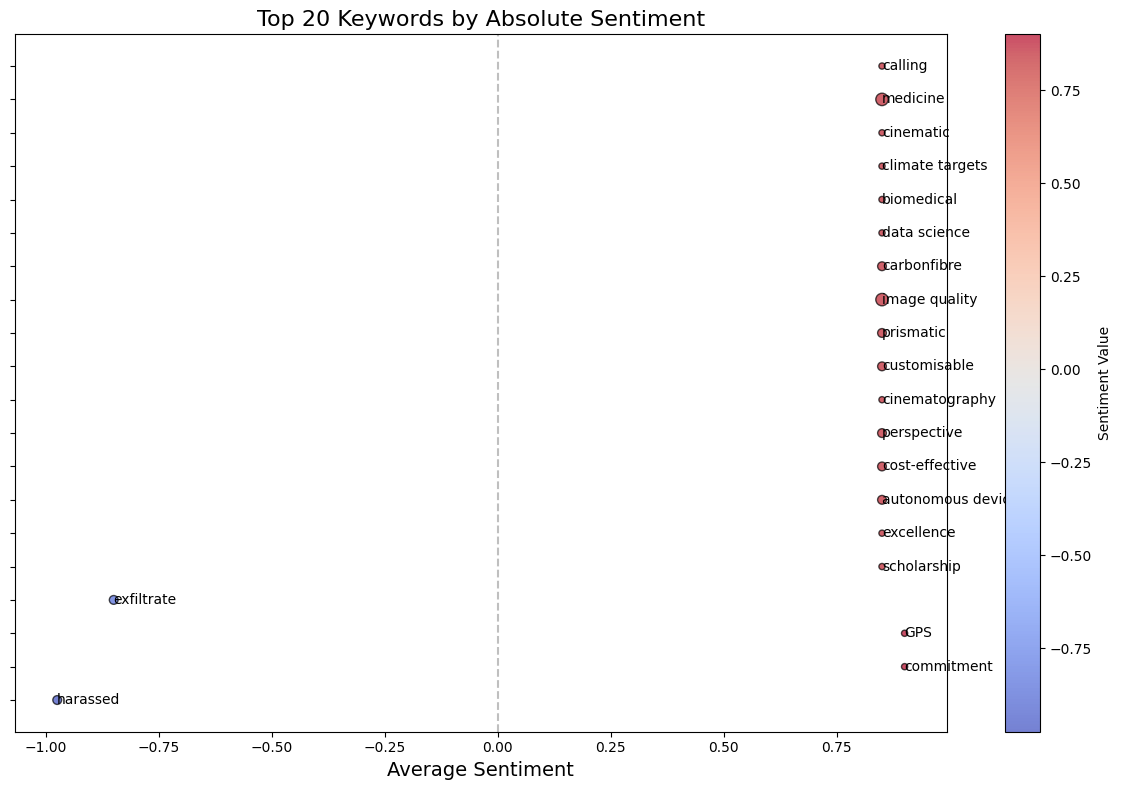

In [ ]:
import matplotlib.pyplot as plt

def plot_top_keywords_scatter(df):
    plt.figure(figsize=(12, 8))

    # Scatter plot
    plt.scatter(
        df['avg_sentiment'],
        range(len(df)),
        s=df['article_count'] * 20,  # Bubble size based on article count
        c=df['avg_sentiment'],
        cmap='coolwarm',
        edgecolors='black',
        alpha=0.7
    )

    # Add labels to the points
    for i, keyword in enumerate(df['keyword']):
        plt.text(df['avg_sentiment'].iloc[i], i, keyword, fontsize=10, ha='left', va='center')

    # Customize plot
    plt.axvline(x=0, color='grey', linestyle='--', alpha=0.5)  # Vertical line at 0 sentiment
    plt.yticks(range(len(df)), [])  # Remove y-axis labels
    plt.colorbar(label='Sentiment Value')
    plt.title('Top 20 Keywords by Absolute Sentiment', fontsize=16)
    plt.xlabel('Average Sentiment', fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the function
plot_top_keywords_scatter(top_20_keywords_by_absolute_sentiment_df)